# Die Klimaerwärmung im regionalen Fokus
Analyse der Temperatur- und Niederschlagsentwicklung seit 1961 in den Tieflagen der Zürichseereaum anhand der Monats-Daten der Wetterstation Wädenswil und Vergleich zur schweizweiten Entwicklung.

These: Obwohl die Messstation Wädenswil erst seit 1981 standartisierte Messdaten zur Temperatur liefert, ist der "Klima-Sprung" der letzten Jahre klar erkennbar. Besonders ausgeprägt ist die Erwärmungstrend in den Übergangsjahreszeiten (Herbst und Frühling) sowie seit den 2000ern auch im Sommer.

Beim Niederschlag sind keine einheitlichen Trends zu erkennen (Messdaten sind hier seit 1961 verfügbar). Aufgrund der Nähe zu den Voralpen (Staueffekte) dürfte tendenziell sogar eine Zunahme der Niederschlagsmengen erkennbar sein.

Herkunft der Daten: Meteoschweiz

In [1]:
#Diese Librarys brauche ich
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from PIL import Image
import matplotlib
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from numpy.random import rand
from datetime import datetime
import calendar
import datetime
import matplotlib.ticker as ticker
%matplotlib inline

In [2]:
#Datensätze für Monatswerte und Tageswerte (Tmin/Tmax) einlesen
path = 'klima/waedenswil/data_waedenswil (1).xlsx'
path2 = 'klima/waedenswil/tmin_tmax.xlsx'

In [3]:
#Monatswerte
df = pd.read_excel(path)

In [4]:
#Tageswerte (Min/Max)
df_day = pd.read_excel(path2)

In [5]:
df.shape

(716, 3)

In [6]:
df_day.shape

(14244, 5)

In [7]:
df.dtypes

Messstation Wädenswil    object
Unnamed: 1               object
Unnamed: 2               object
dtype: object

In [8]:
df_day.dtypes

Jahr       int64
Monat      int64
Tag        int64
Min      float64
Max      float64
dtype: object

# Analyse Monatswerte

In [9]:
#Die ersten 8 Zeilen können weg, braucht es nicht
df = pd.read_excel(path,skiprows=8)

In [10]:
#Den Index auf die Zeitreihe setzen
df.set_index('Unnamed: 0', inplace=True)

In [11]:
#Problem: Temperatur wird erst seit 1981 gemessen. Deshalb ein zweites Dataframe machen mit den Daten seit 1981
df.iloc[240:716]
df_temp = df.iloc[240:716]

In [12]:
df_temp.tail()

,Monatsmittel,Monatssumme
Unnamed: 0,,
2019-08-01,19.2,155.6
2019-09-01,15.3,126.9
2019-10-01,12,174.5
2019-11-01,5.9,102.0
2019-12-01,4.4,89.4


In [13]:
#Neues Frame nur mit dem Monatsmittel
df_temp['Monatsmittel']
df_temp_only = df_temp['Monatsmittel']

In [14]:
#Neues Frame nur mit dem Niederschlag
df['Monatssumme']
df_ns_only = df['Monatssumme']

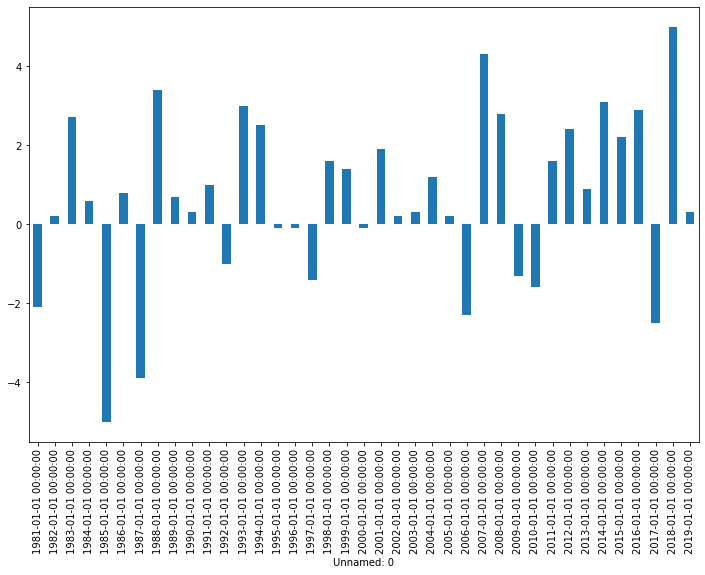

In [15]:
# Plot-Roboter mit Date-Time-Picking bauen, um durch die einzelnen Monate zu gehen (Durchschnittstemperatur)
df_temp_only[df_temp_only.index.month == 1].plot(kind='bar', figsize = (12,8))

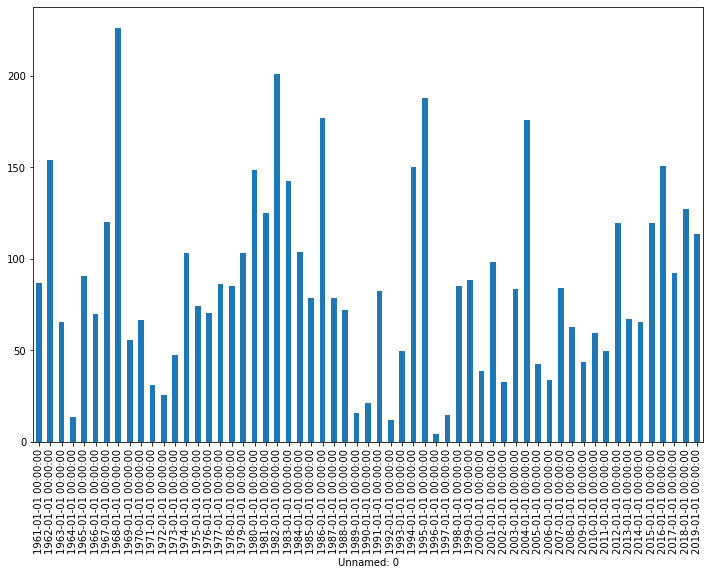

In [16]:
# Plot-Roboter mit Date-Time-Picking bauen, um durch die einzelnen Monate zu gehen (Niederschlag)
df_ns_only[df_ns_only.index.month == 1].plot(kind='bar', figsize = (12,8))

# Datenanalyse Temperatur

In [17]:
#Monate in separaten Frames speichern und Datenframes draus machen
df_jan = pd.DataFrame(df_temp_only[df_temp_only.index.month == 1])
df_feb = pd.DataFrame(df_temp_only[df_temp_only.index.month == 2])
df_mar = pd.DataFrame(df_temp_only[df_temp_only.index.month == 3])
df_apr = pd.DataFrame(df_temp_only[df_temp_only.index.month == 4])
df_mai = pd.DataFrame(df_temp_only[df_temp_only.index.month == 5])
df_jun = pd.DataFrame(df_temp_only[df_temp_only.index.month == 6])
df_jul = pd.DataFrame(df_temp_only[df_temp_only.index.month == 7])
df_aug = pd.DataFrame(df_temp_only[df_temp_only.index.month == 8])
df_sep = pd.DataFrame(df_temp_only[df_temp_only.index.month == 9])
df_okt = pd.DataFrame(df_temp_only[df_temp_only.index.month == 10])
df_nov = pd.DataFrame(df_temp_only[df_temp_only.index.month == 11])
df_dez = pd.DataFrame(df_temp_only[df_temp_only.index.month == 12])

In [18]:
# Dicts machen mit den 30-jährigen Normwerten der Station: 1961-90 sowie 1981-2010. Quelle: Meteoschweiz
mean61_90 = {'jan':-0.4,'feb':1,'mar':4.2,'apr':8.1,'mai':12.4,
             'jun':15.7,'jul':18,'aug':17,'sep':14.2,'okt':9.5,'nov':4.3,'dez':0.7}
mean81_10 = {'jan':0.3,'feb':1.2,'mar':5.2,'apr':9.0,'mai':13.6,
             'jun':16.8,'jul':19,'aug':18.3,'sep':14.4,'okt':10.2,'nov':4.6,'dez':1.6}

In [19]:
#Abweichung vom Mittelwert 1961-1990 berechnen für Januar bis Dezember
df_jan - (-0.4)
df_jan_abw_6190 = df_jan - (-0.4)
df_feb - 1
df_feb_abw_6190 = df_feb - 1
df_mar - 4.2
df_mar_abw_6190 = df_mar - 4.2
df_apr - 8.1
df_apr_abw_6190 = df_apr - 8.1
df_mai - 12.4
df_mai_abw_6190 = df_mai - 12.4
df_jun - 15.7
df_jun_abw_6190 = df_jun - 15.7
df_jul - 18
df_jul_abw_6190 = df_jul - 18
df_aug - 17
df_aug_abw_6190 = df_aug - 17
df_sep - 14.2
df_sep_abw_6190 = df_sep - 14.2
df_okt - 9.5
df_okt_abw_6190 = df_okt - 9.5
df_nov - 4.3
df_nov_abw_6190 = df_nov - 4.3
df_dez - 0.7
df_dez_abw_6190 = df_dez - 0.7

In [20]:
#Abweichung vom Mittelwert 1981-2010 berechnen für den Januar bis Dezember
df_jan - 0.3
df_jan_abw_8110 = df_jan - 0.3
df_feb - 1.2
df_feb_abw_8110 = df_feb - 1.2
df_mar - 5.2
df_mar_abw_8110 = df_mar - 5.2
df_apr - 9
df_apr_abw_8110 = df_apr - 9
df_mai - 13.6
df_mai_abw_8110 = df_mai - 13.6
df_jun - 16.8
df_jun_abw_8110 = df_jun - 16.8
df_jul - 19
df_jul_abw_8110 = df_jul - 19
df_aug - 18.3
df_aug_abw_8110 = df_aug - 18.3
df_sep - 14.4
df_sep_abw_8110 = df_sep - 14.4
df_okt - 10.2
df_okt_abw_8110 = df_okt - 10.2
df_nov - 4.6
df_nov_abw_8110 = df_nov - 4.6
df_dez - 1.6
df_dez_abw_8110 = df_dez - 1.6

# Abeichung grafisch passend darstellen
Positive Abweichung in der Grafik in roten Tönen, negative Abweichung in blauen Tönen. Je extremer die Abweichung vom Mittel, desto höher die Abweichung und stärker der Farbton.

In [21]:
# Minimal- und Maximalwerte für die Normierung der Farbskalen ermitteln 61-91
minimum1 = df_jan_abw_6190['Monatsmittel'].min()
maximum1 = df_jan_abw_6190['Monatsmittel'].max()
minimum2 = df_feb_abw_6190['Monatsmittel'].min()
maximum2 = df_feb_abw_6190['Monatsmittel'].max()
minimum3 = df_mar_abw_6190['Monatsmittel'].min()-2
maximum3 = df_mar_abw_6190['Monatsmittel'].max()
minimum4 = df_apr_abw_6190['Monatsmittel'].min()-4
maximum4 = df_apr_abw_6190['Monatsmittel'].max()
minimum5 = df_mai_abw_6190['Monatsmittel'].min()-1
maximum5 = df_mai_abw_6190['Monatsmittel'].max()
minimum6 = df_jun_abw_6190['Monatsmittel'].min()-5.5
maximum6 = df_jun_abw_6190['Monatsmittel'].max()
minimum7 = df_jul_abw_6190['Monatsmittel'].min()-3.2
maximum7 = df_jul_abw_6190['Monatsmittel'].max()
minimum8 = df_aug_abw_6190['Monatsmittel'].min()-4
maximum8 = df_aug_abw_6190['Monatsmittel'].max()
minimum9 = df_sep_abw_6190['Monatsmittel'].min()
maximum9 = df_sep_abw_6190['Monatsmittel'].max()
minimum10 = df_okt_abw_6190['Monatsmittel'].min()-1.2
maximum10 = df_okt_abw_6190['Monatsmittel'].max()
minimum11 = df_nov_abw_6190['Monatsmittel'].min()-1
maximum11 = df_nov_abw_6190['Monatsmittel'].max()
minimum12 = df_dez_abw_6190['Monatsmittel'].min()-2.6
maximum12 = df_dez_abw_6190['Monatsmittel'].max()

In [22]:
# Minimal- und Maximalwerte für die Normierung der Farbskalen ermitteln 81-10
minimum_neu1 = df_jan_abw_8110['Monatsmittel'].min()-0.5
maximum_neu1 = df_jan_abw_8110['Monatsmittel'].max()
minimum_neu2 = df_feb_abw_8110['Monatsmittel'].min()
maximum_neu2 = df_feb_abw_8110['Monatsmittel'].max()+0.7
minimum_neu3 = df_mar_abw_8110['Monatsmittel'].min()
maximum_neu3 = df_mar_abw_8110['Monatsmittel'].max()+0.6
minimum_neu4 = df_apr_abw_8110['Monatsmittel'].min()
maximum_neu4 = df_apr_abw_8110['Monatsmittel'].max()-2.3
minimum_neu5 = df_mai_abw_8110['Monatsmittel'].min()
maximum_neu5 = df_mai_abw_8110['Monatsmittel'].max()+1.6
minimum_neu6 = df_jun_abw_8110['Monatsmittel'].min()
maximum_neu6 = df_jun_abw_8110['Monatsmittel'].max()-3.2
minimum_neu7 = df_jul_abw_8110['Monatsmittel'].min()
maximum_neu7 = df_jul_abw_8110['Monatsmittel'].max()-1.2
minimum_neu8 = df_aug_abw_8110['Monatsmittel'].min()
maximum_neu8 = df_aug_abw_8110['Monatsmittel'].max()-1.4
minimum_neu9 = df_sep_abw_8110['Monatsmittel'].min()
maximum_neu9 = df_sep_abw_8110['Monatsmittel'].max()+0.4
minimum_neu10 = df_okt_abw_8110['Monatsmittel'].min()
maximum_neu10 = df_okt_abw_8110['Monatsmittel'].max()+0.2
minimum_neu11 = df_nov_abw_8110['Monatsmittel'].min()
maximum_neu11 = df_nov_abw_8110['Monatsmittel'].max()-0.5
minimum_neu12 = df_dez_abw_8110['Monatsmittel'].min()-0.9
maximum_neu12 = df_dez_abw_8110['Monatsmittel'].max()

In [23]:
# Farbskalen normieren 61-91
norming1 = matplotlib.colors.Normalize(vmin=minimum1, vmax=maximum1, clip=True)
norming2 = matplotlib.colors.Normalize(vmin=minimum2, vmax=maximum2, clip=True)
norming3 = matplotlib.colors.Normalize(vmin=minimum3, vmax=maximum3, clip=True)
norming4 = matplotlib.colors.Normalize(vmin=minimum4, vmax=maximum4, clip=True)
norming5 = matplotlib.colors.Normalize(vmin=minimum5, vmax=maximum5, clip=True)
norming6 = matplotlib.colors.Normalize(vmin=minimum6, vmax=maximum6, clip=True)
norming7 = matplotlib.colors.Normalize(vmin=minimum7, vmax=maximum7, clip=True)
norming8 = matplotlib.colors.Normalize(vmin=minimum8, vmax=maximum8, clip=True)
norming9 = matplotlib.colors.Normalize(vmin=minimum9, vmax=maximum9, clip=True)
norming10 = matplotlib.colors.Normalize(vmin=minimum10, vmax=maximum10, clip=True)
norming11 = matplotlib.colors.Normalize(vmin=minimum11, vmax=maximum11, clip=True)
norming12 = matplotlib.colors.Normalize(vmin=minimum12, vmax=maximum12, clip=True)

In [24]:
# Farbskalen normieren 81-10
norming_neu1 = matplotlib.colors.Normalize(vmin=minimum_neu1, vmax=maximum_neu1, clip=True)
norming_neu2 = matplotlib.colors.Normalize(vmin=minimum_neu2, vmax=maximum_neu2, clip=True)
norming_neu3 = matplotlib.colors.Normalize(vmin=minimum_neu3, vmax=maximum_neu3, clip=True)
norming_neu4 = matplotlib.colors.Normalize(vmin=minimum_neu4, vmax=maximum_neu4, clip=True)
norming_neu5 = matplotlib.colors.Normalize(vmin=minimum_neu5, vmax=maximum_neu5, clip=True)
norming_neu6 = matplotlib.colors.Normalize(vmin=minimum_neu6, vmax=maximum_neu6, clip=True)
norming_neu7 = matplotlib.colors.Normalize(vmin=minimum_neu7, vmax=maximum_neu7, clip=True)
norming_neu8 = matplotlib.colors.Normalize(vmin=minimum_neu8, vmax=maximum_neu8, clip=True)
norming_neu9 = matplotlib.colors.Normalize(vmin=minimum_neu9, vmax=maximum_neu9, clip=True)
norming_neu10 = matplotlib.colors.Normalize(vmin=minimum_neu10, vmax=maximum_neu10, clip=True)
norming_neu11 = matplotlib.colors.Normalize(vmin=minimum_neu11, vmax=maximum_neu11, clip=True)
norming_neu12 = matplotlib.colors.Normalize(vmin=minimum_neu12, vmax=maximum_neu12, clip=True)

In [25]:
# Colormap auswählen
#farbschema = plt.cm.RdBu_r
farbschema = plt.cm.coolwarm

In [26]:
# Colormap auswählen und Norm übergeben 61-91
mapper1 = plt.cm.ScalarMappable(norm=norming1, cmap=farbschema)
mapper2 = plt.cm.ScalarMappable(norm=norming2, cmap=farbschema)
mapper3 = plt.cm.ScalarMappable(norm=norming3, cmap=farbschema)
mapper4 = plt.cm.ScalarMappable(norm=norming4, cmap=farbschema)
mapper5 = plt.cm.ScalarMappable(norm=norming5, cmap=farbschema)
mapper6 = plt.cm.ScalarMappable(norm=norming6, cmap=farbschema)
mapper7 = plt.cm.ScalarMappable(norm=norming7, cmap=farbschema)
mapper8 = plt.cm.ScalarMappable(norm=norming8, cmap=farbschema)
mapper9 = plt.cm.ScalarMappable(norm=norming9, cmap=farbschema)
mapper10 = plt.cm.ScalarMappable(norm=norming10, cmap=farbschema)
mapper11 = plt.cm.ScalarMappable(norm=norming11, cmap=farbschema)
mapper12 = plt.cm.ScalarMappable(norm=norming12, cmap=farbschema)

In [27]:
# Colormap auswählen und Norm übergeben 81-10
mapper_neu1 = plt.cm.ScalarMappable(norm=norming_neu1, cmap=farbschema)
mapper_neu2 = plt.cm.ScalarMappable(norm=norming_neu2, cmap=farbschema)
mapper_neu3 = plt.cm.ScalarMappable(norm=norming_neu3, cmap=farbschema)
mapper_neu4 = plt.cm.ScalarMappable(norm=norming_neu4, cmap=farbschema)
mapper_neu5 = plt.cm.ScalarMappable(norm=norming_neu5, cmap=farbschema)
mapper_neu6 = plt.cm.ScalarMappable(norm=norming_neu6, cmap=farbschema)
mapper_neu7 = plt.cm.ScalarMappable(norm=norming_neu7, cmap=farbschema)
mapper_neu8 = plt.cm.ScalarMappable(norm=norming_neu8, cmap=farbschema)
mapper_neu9 = plt.cm.ScalarMappable(norm=norming_neu9, cmap=farbschema)
mapper_neu10 = plt.cm.ScalarMappable(norm=norming_neu10, cmap=farbschema)
mapper_neu11 = plt.cm.ScalarMappable(norm=norming_neu11, cmap=farbschema)
mapper_neu12 = plt.cm.ScalarMappable(norm=norming_neu12, cmap=farbschema)

In [28]:
# Mit Lambda auf die jeweiligen Monatsmittelwerte verteilen 61-91
colors1 = df_jan_abw_6190['Monatsmittel'].apply(lambda x: mcolors.to_hex(mapper1.to_rgba(x)))
colors2 = df_feb_abw_6190['Monatsmittel'].apply(lambda x: mcolors.to_hex(mapper2.to_rgba(x)))
colors3 = df_mar_abw_6190['Monatsmittel'].apply(lambda x: mcolors.to_hex(mapper3.to_rgba(x)))
colors4 = df_apr_abw_6190['Monatsmittel'].apply(lambda x: mcolors.to_hex(mapper4.to_rgba(x)))
colors5 = df_mai_abw_6190['Monatsmittel'].apply(lambda x: mcolors.to_hex(mapper5.to_rgba(x)))
colors6 = df_jun_abw_6190['Monatsmittel'].apply(lambda x: mcolors.to_hex(mapper6.to_rgba(x)))
colors7 = df_jul_abw_6190['Monatsmittel'].apply(lambda x: mcolors.to_hex(mapper7.to_rgba(x)))
colors8 = df_aug_abw_6190['Monatsmittel'].apply(lambda x: mcolors.to_hex(mapper8.to_rgba(x)))
colors9 = df_sep_abw_6190['Monatsmittel'].apply(lambda x: mcolors.to_hex(mapper9.to_rgba(x)))
colors10 = df_okt_abw_6190['Monatsmittel'].apply(lambda x: mcolors.to_hex(mapper10.to_rgba(x)))
colors11 = df_nov_abw_6190['Monatsmittel'].apply(lambda x: mcolors.to_hex(mapper11.to_rgba(x)))
colors12 = df_dez_abw_6190['Monatsmittel'].apply(lambda x: mcolors.to_hex(mapper12.to_rgba(x)))

In [29]:
# Mit Lambda auf die jeweiligen Monatsmittelwerte verteilen 81-10
colors_neu1 = df_jan_abw_8110['Monatsmittel'].apply(lambda x: mcolors.to_hex(mapper_neu1.to_rgba(x)))
colors_neu2 = df_feb_abw_8110['Monatsmittel'].apply(lambda x: mcolors.to_hex(mapper_neu2.to_rgba(x)))
colors_neu3 = df_mar_abw_8110['Monatsmittel'].apply(lambda x: mcolors.to_hex(mapper_neu3.to_rgba(x)))
colors_neu4 = df_apr_abw_8110['Monatsmittel'].apply(lambda x: mcolors.to_hex(mapper_neu4.to_rgba(x)))
colors_neu5 = df_mai_abw_8110['Monatsmittel'].apply(lambda x: mcolors.to_hex(mapper_neu5.to_rgba(x)))
colors_neu6 = df_jun_abw_8110['Monatsmittel'].apply(lambda x: mcolors.to_hex(mapper_neu6.to_rgba(x)))
colors_neu7 = df_jul_abw_8110['Monatsmittel'].apply(lambda x: mcolors.to_hex(mapper_neu7.to_rgba(x)))
colors_neu8 = df_aug_abw_8110['Monatsmittel'].apply(lambda x: mcolors.to_hex(mapper_neu8.to_rgba(x)))
colors_neu9 = df_sep_abw_8110['Monatsmittel'].apply(lambda x: mcolors.to_hex(mapper_neu9.to_rgba(x)))
colors_neu10 = df_okt_abw_8110['Monatsmittel'].apply(lambda x: mcolors.to_hex(mapper_neu10.to_rgba(x)))
colors_neu11 = df_nov_abw_8110['Monatsmittel'].apply(lambda x: mcolors.to_hex(mapper_neu11.to_rgba(x)))
colors_neu12 = df_dez_abw_8110['Monatsmittel'].apply(lambda x: mcolors.to_hex(mapper_neu12.to_rgba(x)))

In [30]:
# Test, so sieht eine Farbliste aus
colors3

Unnamed: 0
1981-03-01    #ec7f63
1982-03-01    #dadce0
1983-03-01    #f5c0a7
1984-03-01    #afcafc
1985-03-01    #c6d6f1
1986-03-01    #cad8ef
1987-03-01    #7b9ff9
1988-03-01    #ccd9ed
1989-03-01    #d65244
1990-03-01    #ee8468
1991-03-01    #ea7b60
1992-03-01    #f7ac8e
1993-03-01    #dcdddd
1994-03-01    #b40426
1995-03-01    #cfdaea
1996-03-01    #bad0f8
1997-03-01    #ea7b60
1998-03-01    #f3c8b2
1999-03-01    #f7b79b
2000-03-01    #f7b093
2001-03-01    #ef886b
2002-03-01    #ec7f63
2003-03-01    #ef886b
2004-03-01    #e7d7ce
2005-03-01    #f5c2aa
2006-03-01    #bcd2f7
2007-03-01    #f7b396
2008-03-01    #efcfbf
2009-03-01    #e4d9d2
2010-03-01    #edd2c3
2011-03-01    #f39577
2012-03-01    #dc5d4a
2013-03-01    #c0d4f5
2014-03-01    #ea7b60
2015-03-01    #f6a283
2016-03-01    #f1cdba
2017-03-01    #c32e31
2018-03-01    #dadce0
2019-03-01    #ea7b60
Name: Monatsmittel, dtype: object

# Grafische Darstellung

Darstellung der Temperaturverläufe seit 1981 (im Vergeich zu den 30-jährigen Normwerten 1961-1990 und 1981-2010). Mit dem Loop wird die hässliche Timestamp-Darstellung korrigiert, die bei den Bar-Charts in Pandas auftritt. Dem Monat wird jeweils das Jahr zugeordnet und in der Achse ausgegeben. Die errechneten Farbwerte werden auf die Grafik angewendet. Hinzu kommen kosmetische Anpassungen (Titel, etc.). 

# 1. Abweichung zur Norm 1961-1990

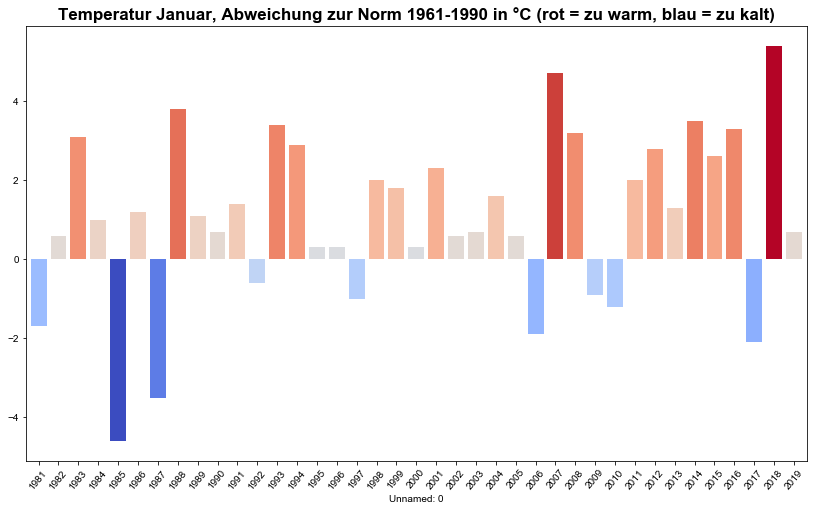

In [31]:
def line_format(label):
    month = label.month_name()[:3]
    year = label.year
    if month == 'jan':
        month = f'\n{label.year}'
    return year
grafiktemp1 = df_jan_abw_6190['Monatsmittel'].plot(kind='bar',figsize=(14,8), 
                                                   color=colors1, rot=50, width=0.8)
grafiktemp1.set_xticklabels(map(lambda x: line_format(x), df_jan_abw_6190['Monatsmittel'].index))
title_font = {'fontsize': 17, 'fontweight': 'bold', 'fontname': 'Arial'}
grafiktemp1.set_title('Temperatur Januar, Abweichung zur Norm 1961-1990 in °C (rot = zu warm, blau = zu kalt)', 
                      fontdict=title_font)
plt.style.use('seaborn-whitegrid')

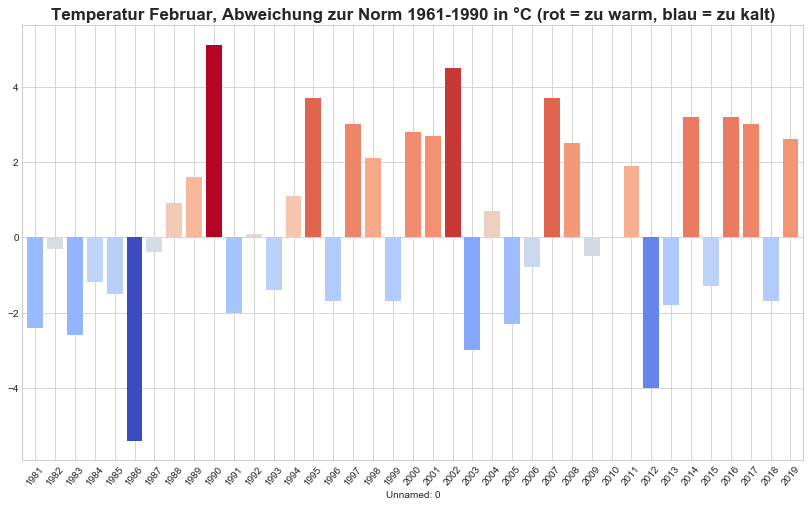

In [32]:
def line_format(label):
    month = label.month_name()[:3]
    year = label.year
    if month == 'feb':
        month = f'\n{label.year}'
    return year
grafiktemp2 = df_feb_abw_6190['Monatsmittel'].plot(kind='bar',figsize=(14,8), 
                                                   color=colors2, rot=50, width=0.8)
grafiktemp2.set_xticklabels(map(lambda x: line_format(x), df_feb_abw_6190['Monatsmittel'].index))
title_font = {'fontsize': 17, 'fontweight': 'bold', 'fontname': 'Arial'}
grafiktemp2.set_title('Temperatur Februar, Abweichung zur Norm 1961-1990 in °C (rot = zu warm, blau = zu kalt)', 
                      fontdict=title_font)
plt.style.use('seaborn-whitegrid')

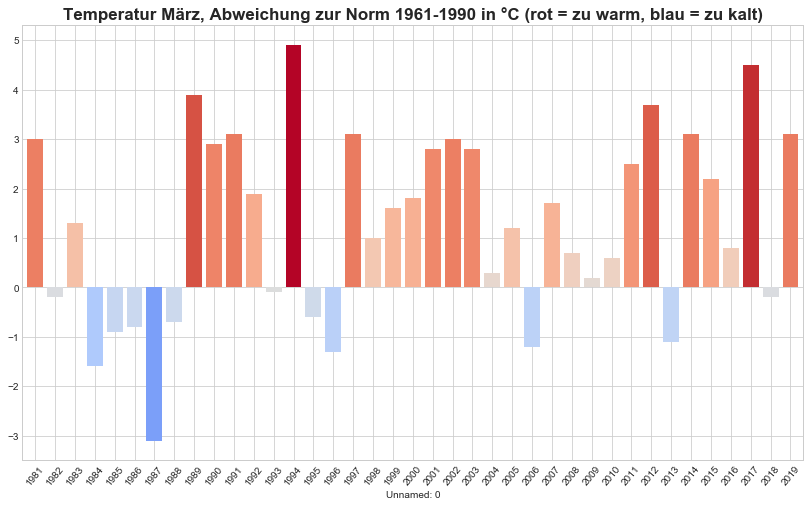

In [33]:
def line_format(label):
    month = label.month_name()[:3]
    year = label.year
    if month == 'mar':
        month = f'\n{label.year}'
    return year
grafiktemp3 = df_mar_abw_6190['Monatsmittel'].plot(kind='bar',figsize=(14,8), 
                                                   color=colors3, rot=50, width=0.8)
grafiktemp3.set_xticklabels(map(lambda x: line_format(x), df_mar_abw_6190['Monatsmittel'].index))
title_font = {'fontsize': 17, 'fontweight': 'bold', 'fontname': 'Arial'}
grafiktemp3.set_title('Temperatur März, Abweichung zur Norm 1961-1990 in °C (rot = zu warm, blau = zu kalt)', 
                      fontdict=title_font)
plt.style.use('seaborn-whitegrid')

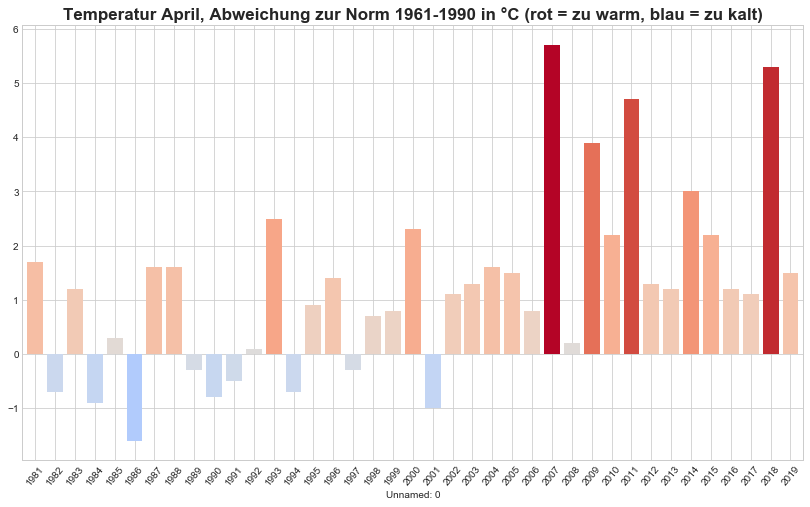

In [34]:
def line_format(label):
    month = label.month_name()[:3]
    year = label.year
    if month == 'apr':
        month = f'\n{label.year}'
    return year
grafiktemp4 = df_apr_abw_6190['Monatsmittel'].plot(kind='bar',figsize=(14,8), 
                                                   color=colors4, rot=50, width=0.8)
grafiktemp4.set_xticklabels(map(lambda x: line_format(x), df_apr_abw_6190['Monatsmittel'].index))
title_font = {'fontsize': 17, 'fontweight': 'bold', 'fontname': 'Arial'}
grafiktemp4.set_title('Temperatur April, Abweichung zur Norm 1961-1990 in °C (rot = zu warm, blau = zu kalt)', 
                      fontdict=title_font)
plt.style.use('seaborn-whitegrid')

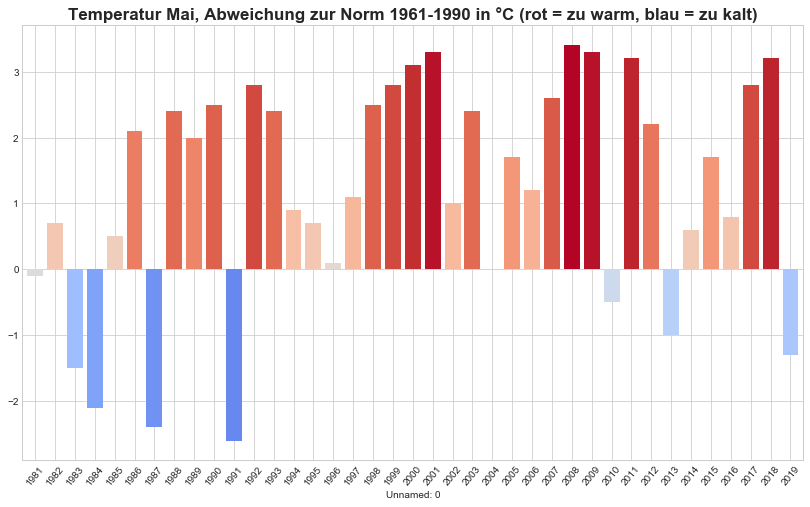

In [35]:
def line_format(label):
    month = label.month_name()[:3]
    year = label.year
    if month == 'mai':
        month = f'\n{label.year}'
    return year
grafiktemp5 = df_mai_abw_6190['Monatsmittel'].plot(kind='bar',figsize=(14,8), 
                                                   color=colors5, rot=50, width=0.8)
grafiktemp5.set_xticklabels(map(lambda x: line_format(x), df_mai_abw_6190['Monatsmittel'].index))
title_font = {'fontsize': 17, 'fontweight': 'bold', 'fontname': 'Arial'}
grafiktemp5.set_title('Temperatur Mai, Abweichung zur Norm 1961-1990 in °C (rot = zu warm, blau = zu kalt)', 
                      fontdict=title_font)
plt.style.use('seaborn-whitegrid')

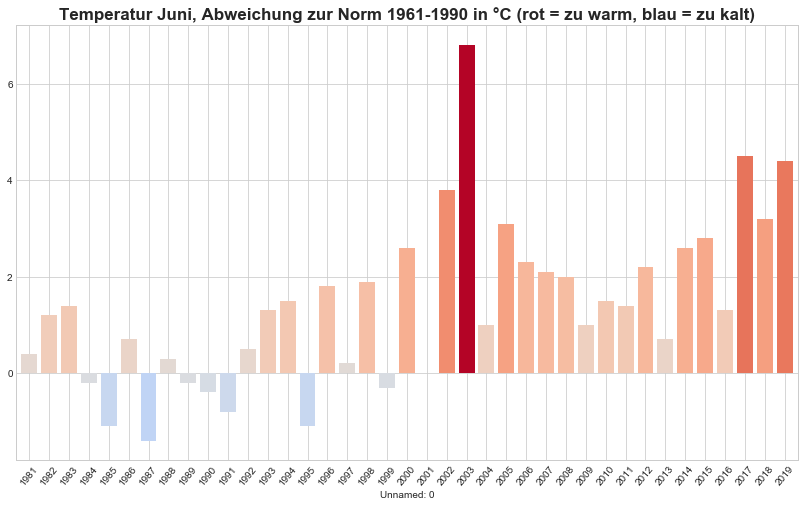

In [36]:
def line_format(label):
    month = label.month_name()[:3]
    year = label.year
    if month == 'jun':
        month = f'\n{label.year}'
    return year
grafiktemp6 = df_jun_abw_6190['Monatsmittel'].plot(kind='bar',figsize=(14,8), 
                                                   color=colors6, rot=50, width=0.8)
grafiktemp6.set_xticklabels(map(lambda x: line_format(x), df_jun_abw_6190['Monatsmittel'].index))
title_font = {'fontsize': 17, 'fontweight': 'bold', 'fontname': 'Arial'}
grafiktemp6.set_title('Temperatur Juni, Abweichung zur Norm 1961-1990 in °C (rot = zu warm, blau = zu kalt)', 
                      fontdict=title_font)
plt.style.use('seaborn-whitegrid')

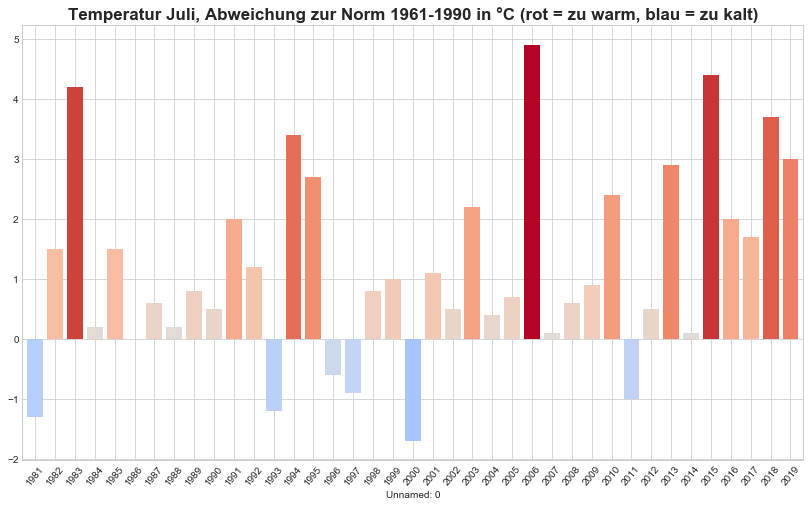

In [37]:
def line_format(label):
    month = label.month_name()[:3]
    year = label.year
    if month == 'jul':
        month = f'\n{label.year}'
    return year
grafiktemp7 = df_jul_abw_6190['Monatsmittel'].plot(kind='bar',figsize=(14,8), 
                                                   color=colors7, rot=50, width=0.8)
grafiktemp7.set_xticklabels(map(lambda x: line_format(x), df_jul_abw_6190['Monatsmittel'].index))
title_font = {'fontsize': 17, 'fontweight': 'bold', 'fontname': 'Arial'}
grafiktemp7.set_title('Temperatur Juli, Abweichung zur Norm 1961-1990 in °C (rot = zu warm, blau = zu kalt)', 
                      fontdict=title_font)
plt.style.use('seaborn-whitegrid')

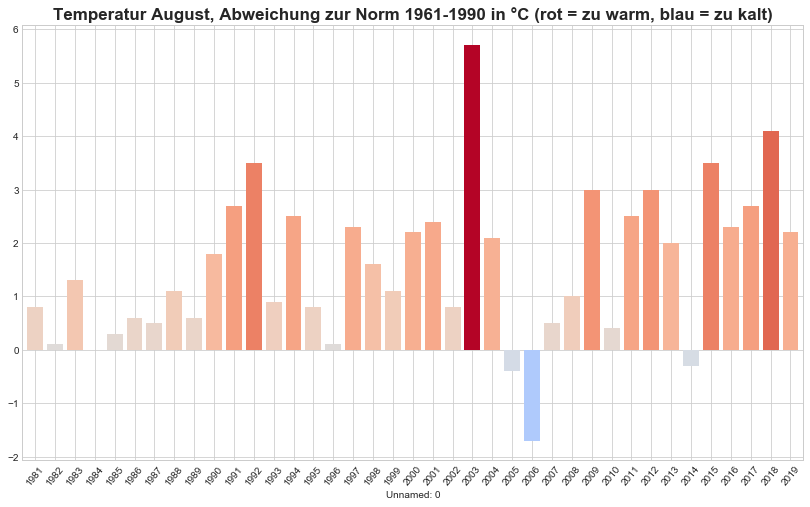

In [38]:
def line_format(label):
    month = label.month_name()[:3]
    year = label.year
    if month == 'aug':
        month = f'\n{label.year}'
    return year
grafiktemp8 = df_aug_abw_6190['Monatsmittel'].plot(kind='bar',figsize=(14,8), 
                                                   color=colors8, rot=50, width=0.8)
grafiktemp8.set_xticklabels(map(lambda x: line_format(x), df_aug_abw_6190['Monatsmittel'].index))
title_font = {'fontsize': 17, 'fontweight': 'bold', 'fontname': 'Arial'}
grafiktemp8.set_title('Temperatur August, Abweichung zur Norm 1961-1990 in °C (rot = zu warm, blau = zu kalt)', 
                      fontdict=title_font)
plt.style.use('seaborn-whitegrid')

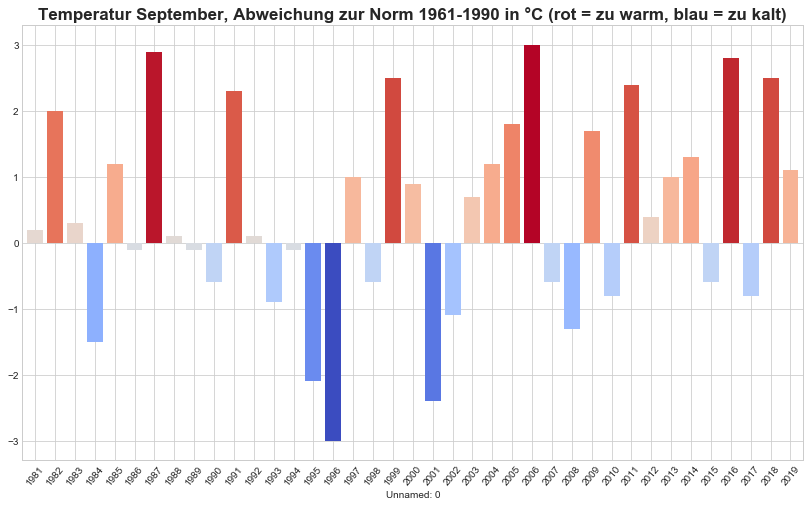

In [39]:
def line_format(label):
    month = label.month_name()[:3]
    year = label.year
    if month == 'sep':
        month = f'\n{label.year}'
    return year
grafiktemp9 = df_sep_abw_6190['Monatsmittel'].plot(kind='bar',figsize=(14,8), 
                                                   color=colors9, rot=50, width=0.8)
grafiktemp9.set_xticklabels(map(lambda x: line_format(x), df_sep_abw_6190['Monatsmittel'].index))
title_font = {'fontsize': 17, 'fontweight': 'bold', 'fontname': 'Arial'}
grafiktemp9.set_title('Temperatur September, Abweichung zur Norm 1961-1990 in °C (rot = zu warm, blau = zu kalt)', 
                      fontdict=title_font)
plt.style.use('seaborn-whitegrid')

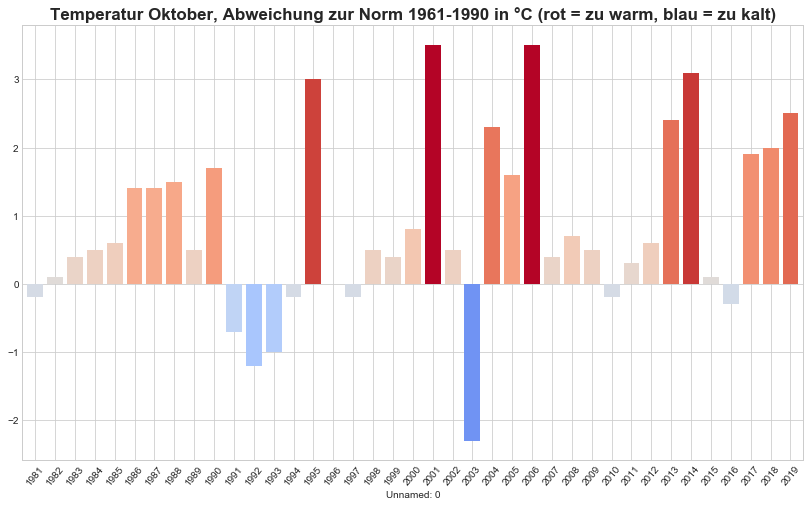

In [40]:
def line_format(label):
    month = label.month_name()[:3]
    year = label.year
    if month == 'okt':
        month = f'\n{label.year}'
    return year
grafiktemp10 = df_okt_abw_6190['Monatsmittel'].plot(kind='bar',figsize=(14,8), 
                                                    color=colors10, rot=50, width=0.8)
grafiktemp10.set_xticklabels(map(lambda x: line_format(x), df_okt_abw_6190['Monatsmittel'].index))
title_font = {'fontsize': 17, 'fontweight': 'bold', 'fontname': 'Arial'}
grafiktemp10.set_title('Temperatur Oktober, Abweichung zur Norm 1961-1990 in °C (rot = zu warm, blau = zu kalt)', 
                      fontdict=title_font)
plt.style.use('seaborn-whitegrid')

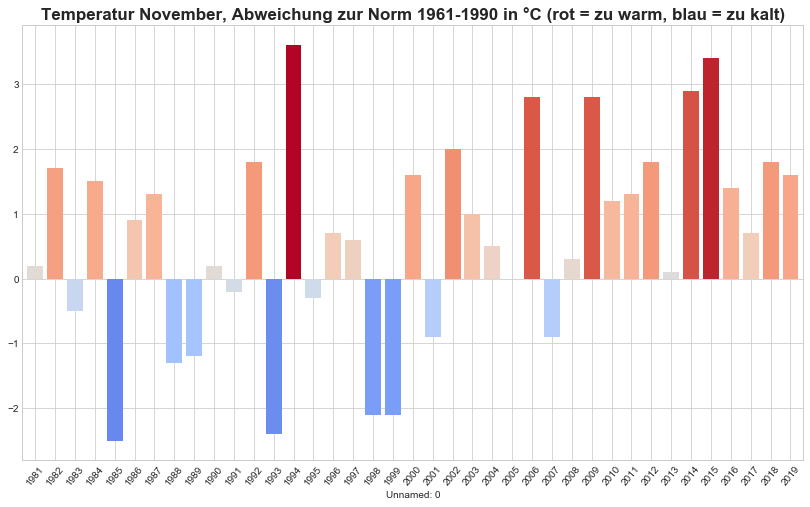

In [41]:
def line_format(label):
    month = label.month_name()[:3]
    year = label.year
    if month == 'nov':
        month = f'\n{label.year}'
    return year
grafiktemp11 = df_nov_abw_6190['Monatsmittel'].plot(kind='bar',figsize=(14,8), 
                                                    color=colors11, rot=50, width=0.8)
grafiktemp11.set_xticklabels(map(lambda x: line_format(x), df_nov_abw_6190['Monatsmittel'].index))
title_font = {'fontsize': 17, 'fontweight': 'bold', 'fontname': 'Arial'}
grafiktemp11.set_title('Temperatur November, Abweichung zur Norm 1961-1990 in °C (rot = zu warm, blau = zu kalt)', 
                      fontdict=title_font)
plt.style.use('seaborn-whitegrid')

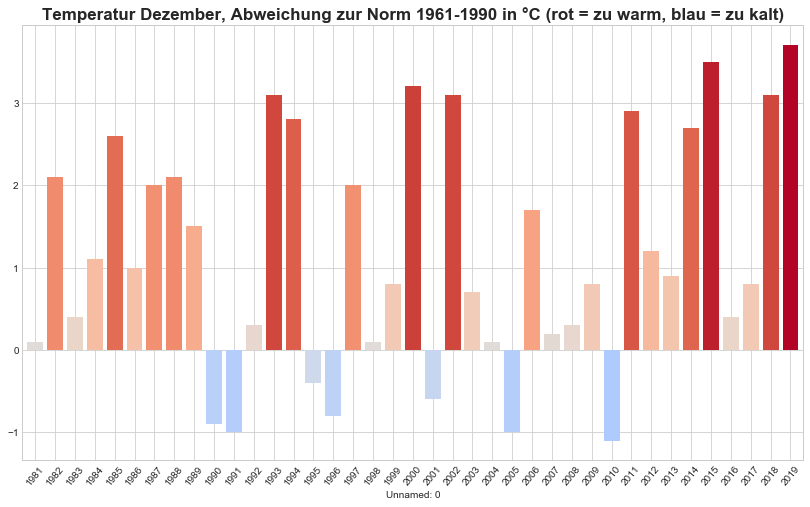

In [42]:
def line_format(label):
    month = label.month_name()[:3]
    year = label.year
    if month == 'dez':
        month = f'\n{label.year}'
    return year
grafiktemp12 = df_dez_abw_6190['Monatsmittel'].plot(kind='bar',figsize=(14,8), 
                                                    color=colors12, rot=50, width=0.8)
grafiktemp12.set_xticklabels(map(lambda x: line_format(x), df_dez_abw_6190['Monatsmittel'].index))
title_font = {'fontsize': 17, 'fontweight': 'bold', 'fontname': 'Arial'}
grafiktemp12.set_title('Temperatur Dezember, Abweichung zur Norm 1961-1990 in °C (rot = zu warm, blau = zu kalt)', 
                      fontdict=title_font)
plt.style.use('seaborn-whitegrid')

# Grafische Darstellung der Abweichung zur Norm 1981-2010

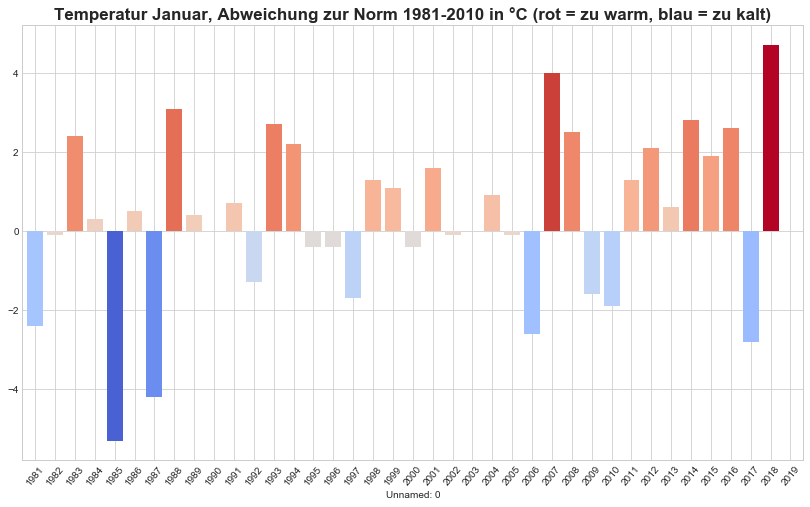

In [43]:
def line_format(label):
    month = label.month_name()[:3]
    year = label.year
    if month == 'jan':
        month = f'\n{label.year}'
    return year
grafiktemp2_1 = df_jan_abw_8110['Monatsmittel'].plot(kind='bar',figsize=(14,8), 
                                                     color=colors_neu1, rot=50, width=0.8)
grafiktemp2_1.set_xticklabels(map(lambda x: line_format(x), df_jan_abw_8110['Monatsmittel'].index))
title_font = {'fontsize': 17, 'fontweight': 'bold', 'fontname': 'Arial'}
grafiktemp2_1.set_title('Temperatur Januar, Abweichung zur Norm 1981-2010 in °C (rot = zu warm, blau = zu kalt)', 
                      fontdict=title_font)
plt.style.use('seaborn-whitegrid')

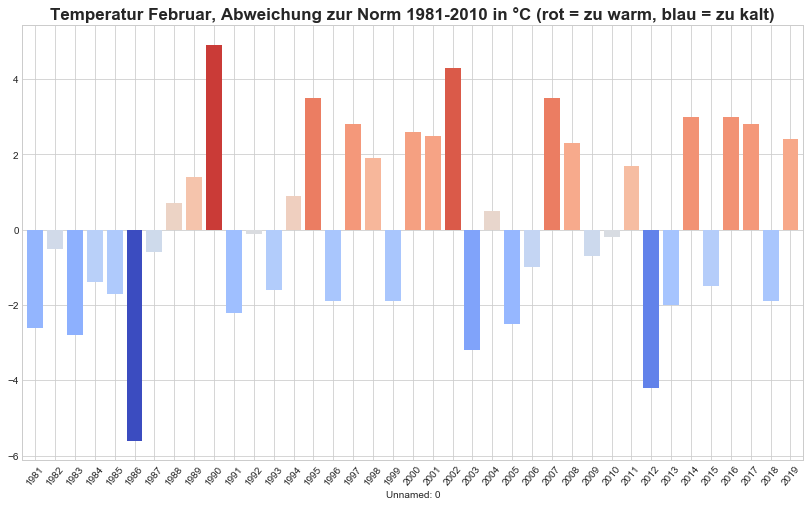

In [44]:
def line_format(label):
    month = label.month_name()[:3]
    year = label.year
    if month == 'feb':
        month = f'\n{label.year}'
    return year
grafiktemp2_2 = df_feb_abw_8110['Monatsmittel'].plot(kind='bar',figsize=(14,8), 
                                                     color=colors_neu2, rot=50, width=0.8)
grafiktemp2_2.set_xticklabels(map(lambda x: line_format(x), df_feb_abw_8110['Monatsmittel'].index))
title_font = {'fontsize': 17, 'fontweight': 'bold', 'fontname': 'Arial'}
grafiktemp2_2.set_title('Temperatur Februar, Abweichung zur Norm 1981-2010 in °C (rot = zu warm, blau = zu kalt)', 
                      fontdict=title_font)
plt.style.use('seaborn-whitegrid')

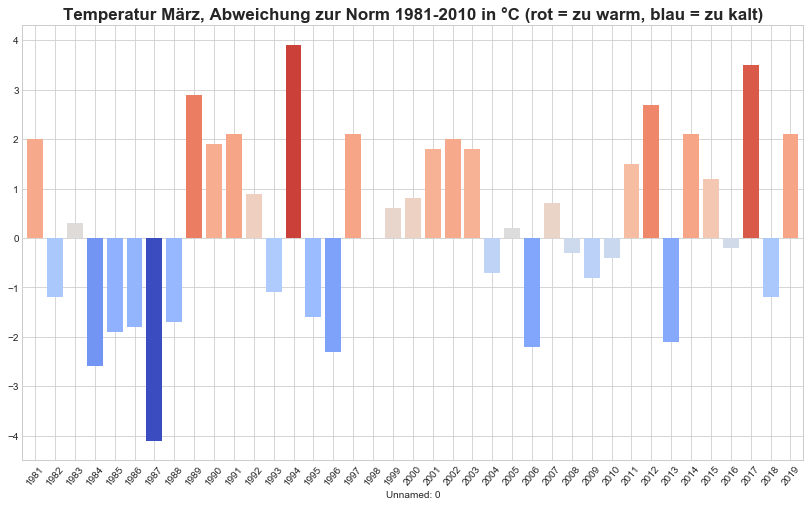

In [45]:
def line_format(label):
    month = label.month_name()[:3]
    year = label.year
    if month == 'mar':
        month = f'\n{label.year}'
    return year
grafiktemp2_3 = df_mar_abw_8110['Monatsmittel'].plot(kind='bar',figsize=(14,8), 
                                                     color=colors_neu3, rot=50, width=0.8)
grafiktemp2_3.set_xticklabels(map(lambda x: line_format(x), df_mar_abw_8110['Monatsmittel'].index))
title_font = {'fontsize': 17, 'fontweight': 'bold', 'fontname': 'Arial'}
grafiktemp2_3.set_title('Temperatur März, Abweichung zur Norm 1981-2010 in °C (rot = zu warm, blau = zu kalt)', 
                      fontdict=title_font)
plt.style.use('seaborn-whitegrid')

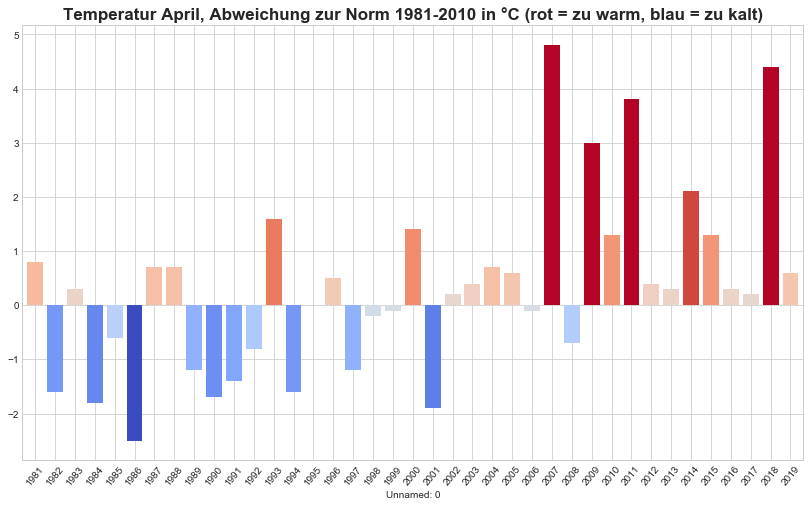

In [46]:
def line_format(label):
    month = label.month_name()[:3]
    year = label.year
    if month == 'apr':
        month = f'\n{label.year}'
    return year
grafiktemp2_4 = df_apr_abw_8110['Monatsmittel'].plot(kind='bar',figsize=(14,8), 
                                                     color=colors_neu4, rot=50, width=0.8)
grafiktemp2_4.set_xticklabels(map(lambda x: line_format(x), df_apr_abw_8110['Monatsmittel'].index))
title_font = {'fontsize': 17, 'fontweight': 'bold', 'fontname': 'Arial'}
grafiktemp2_4.set_title('Temperatur April, Abweichung zur Norm 1981-2010 in °C (rot = zu warm, blau = zu kalt)', 
                      fontdict=title_font)
plt.style.use('seaborn-whitegrid')

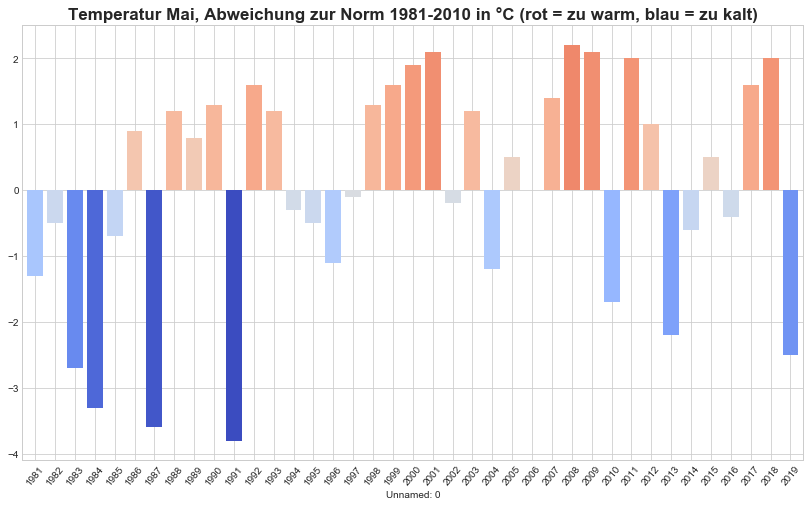

In [47]:
def line_format(label):
    month = label.month_name()[:3]
    year = label.year
    if month == 'mai':
        month = f'\n{label.year}'
    return year
grafiktemp2_5 = df_mai_abw_8110['Monatsmittel'].plot(kind='bar',figsize=(14,8), 
                                                     color=colors_neu5, rot=50, width=0.8)
grafiktemp2_5.set_xticklabels(map(lambda x: line_format(x), df_mai_abw_8110['Monatsmittel'].index))
title_font = {'fontsize': 17, 'fontweight': 'bold', 'fontname': 'Arial'}
grafiktemp2_5.set_title('Temperatur Mai, Abweichung zur Norm 1981-2010 in °C (rot = zu warm, blau = zu kalt)', 
                      fontdict=title_font)
plt.style.use('seaborn-whitegrid')

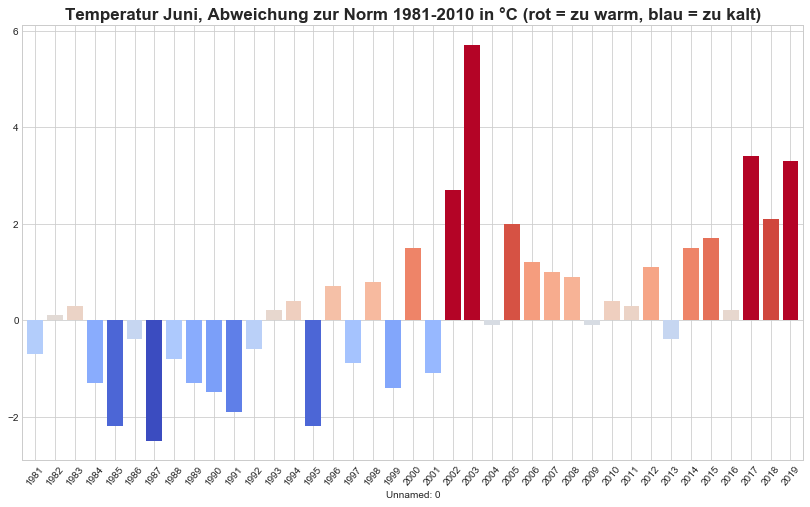

In [48]:
def line_format(label):
    month = label.month_name()[:3]
    year = label.year
    if month == 'jun':
        month = f'\n{label.year}'
    return year
grafiktemp2_6 = df_jun_abw_8110['Monatsmittel'].plot(kind='bar',figsize=(14,8), 
                                                     color=colors_neu6, rot=50, width=0.8)
grafiktemp2_6.set_xticklabels(map(lambda x: line_format(x), df_jun_abw_8110['Monatsmittel'].index))
title_font = {'fontsize': 17, 'fontweight': 'bold', 'fontname': 'Arial'}
grafiktemp2_6.set_title('Temperatur Juni, Abweichung zur Norm 1981-2010 in °C (rot = zu warm, blau = zu kalt)', 
                      fontdict=title_font)
plt.style.use('seaborn-whitegrid')

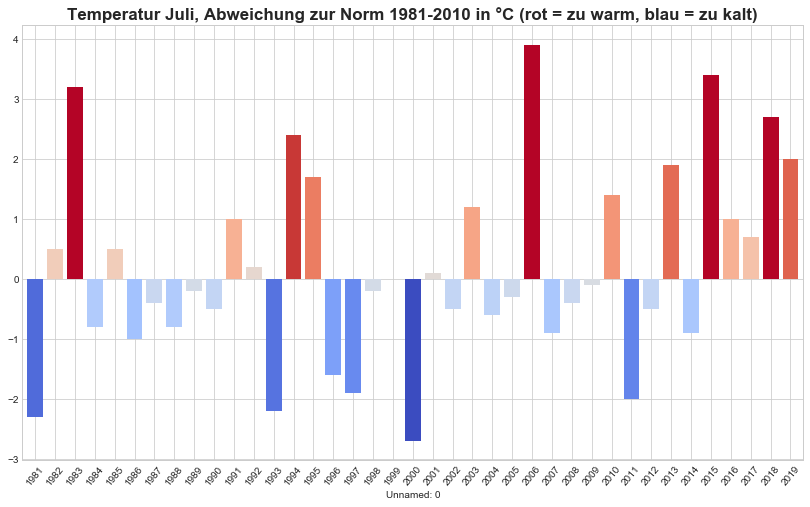

In [49]:
def line_format(label):
    month = label.month_name()[:3]
    year = label.year
    if month == 'jul':
        month = f'\n{label.year}'
    return year
grafiktemp2_7 = df_jul_abw_8110['Monatsmittel'].plot(kind='bar',figsize=(14,8), 
                                                     color=colors_neu7, rot=50, width=0.8)
grafiktemp2_7.set_xticklabels(map(lambda x: line_format(x), df_jul_abw_8110['Monatsmittel'].index))
title_font = {'fontsize': 17, 'fontweight': 'bold', 'fontname': 'Arial'}
grafiktemp2_7.set_title('Temperatur Juli, Abweichung zur Norm 1981-2010 in °C (rot = zu warm, blau = zu kalt)', 
                      fontdict=title_font)
plt.style.use('seaborn-whitegrid')

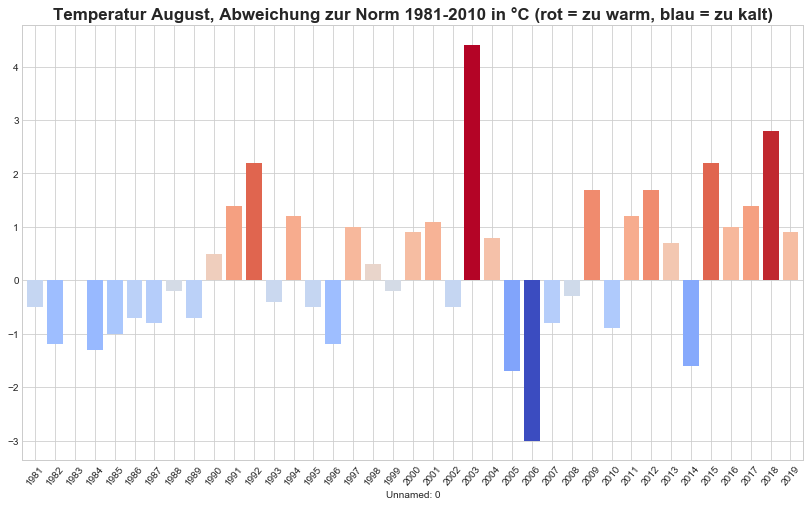

In [50]:
def line_format(label):
    month = label.month_name()[:3]
    year = label.year
    if month == 'aug':
        month = f'\n{label.year}'
    return year
grafiktemp2_8 = df_aug_abw_8110['Monatsmittel'].plot(kind='bar',figsize=(14,8), 
                                                     color=colors_neu8, rot=50, width=0.8)
grafiktemp2_8.set_xticklabels(map(lambda x: line_format(x), df_aug_abw_8110['Monatsmittel'].index))
title_font = {'fontsize': 17, 'fontweight': 'bold', 'fontname': 'Arial'}
grafiktemp2_8.set_title('Temperatur August, Abweichung zur Norm 1981-2010 in °C (rot = zu warm, blau = zu kalt)', 
                      fontdict=title_font)
plt.style.use('seaborn-whitegrid')

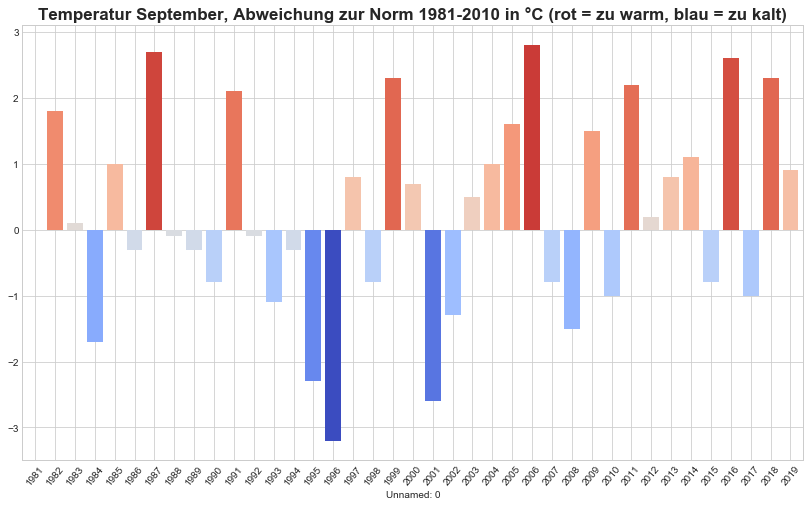

In [51]:
def line_format(label):
    month = label.month_name()[:3]
    year = label.year
    if month == 'sep':
        month = f'\n{label.year}'
    return year
grafiktemp2_9 = df_sep_abw_8110['Monatsmittel'].plot(kind='bar',figsize=(14,8), 
                                                     color=colors_neu9, rot=50, width=0.8)
grafiktemp2_9.set_xticklabels(map(lambda x: line_format(x), df_sep_abw_8110['Monatsmittel'].index))
title_font = {'fontsize': 17, 'fontweight': 'bold', 'fontname': 'Arial'}
grafiktemp2_9.set_title('Temperatur September, Abweichung zur Norm 1981-2010 in °C (rot = zu warm, blau = zu kalt)', 
                      fontdict=title_font)
plt.style.use('seaborn-whitegrid')

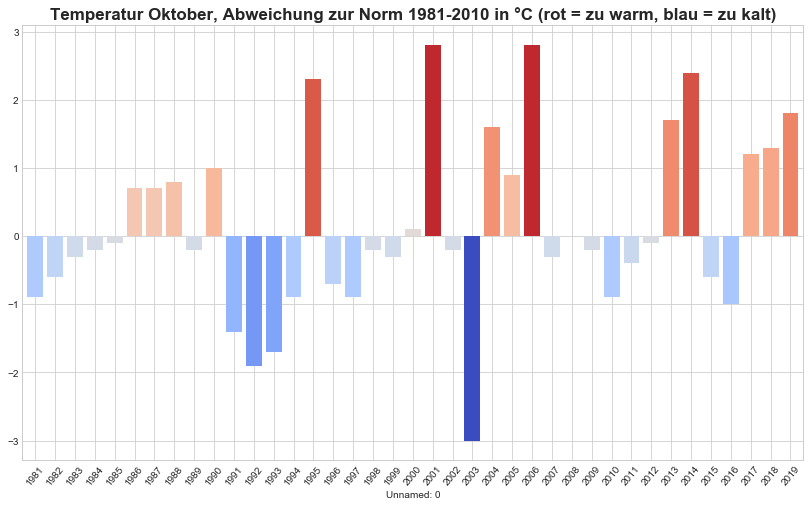

In [52]:
def line_format(label):
    month = label.month_name()[:3]
    year = label.year
    if month == 'okt':
        month = f'\n{label.year}'
    return year
grafiktemp2_10 = df_okt_abw_8110['Monatsmittel'].plot(kind='bar',figsize=(14,8), 
                                                      color=colors_neu10, rot=50, width=0.8)
grafiktemp2_10.set_xticklabels(map(lambda x: line_format(x), df_okt_abw_8110['Monatsmittel'].index))
title_font = {'fontsize': 17, 'fontweight': 'bold', 'fontname': 'Arial'}
grafiktemp2_10.set_title('Temperatur Oktober, Abweichung zur Norm 1981-2010 in °C (rot = zu warm, blau = zu kalt)', 
                      fontdict=title_font)
plt.style.use('seaborn-whitegrid')

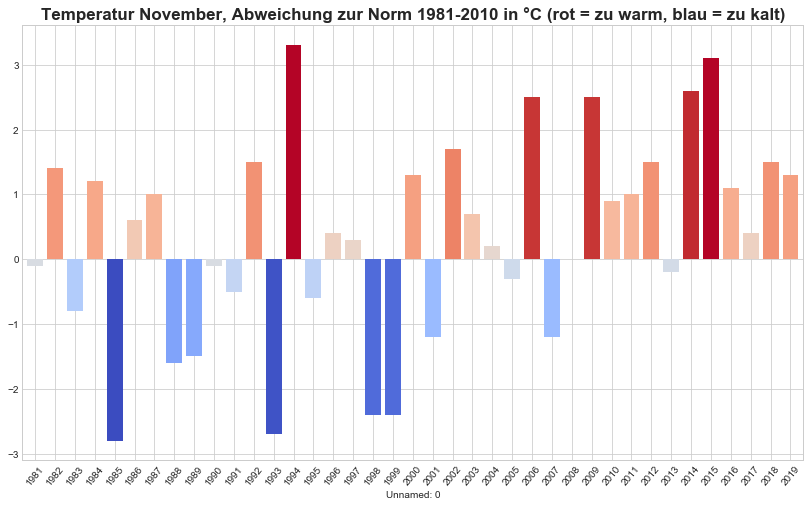

In [53]:
def line_format(label):
    month = label.month_name()[:3]
    year = label.year
    if month == 'nov':
        month = f'\n{label.year}'
    return year
grafiktemp2_11 = df_nov_abw_8110['Monatsmittel'].plot(kind='bar',figsize=(14,8), 
                                                      color=colors_neu11, rot=50, width=0.8)
grafiktemp2_11.set_xticklabels(map(lambda x: line_format(x), df_nov_abw_8110['Monatsmittel'].index))
title_font = {'fontsize': 17, 'fontweight': 'bold', 'fontname': 'Arial'}
grafiktemp2_11.set_title('Temperatur November, Abweichung zur Norm 1981-2010 in °C (rot = zu warm, blau = zu kalt)', 
                      fontdict=title_font)
plt.style.use('seaborn-whitegrid')

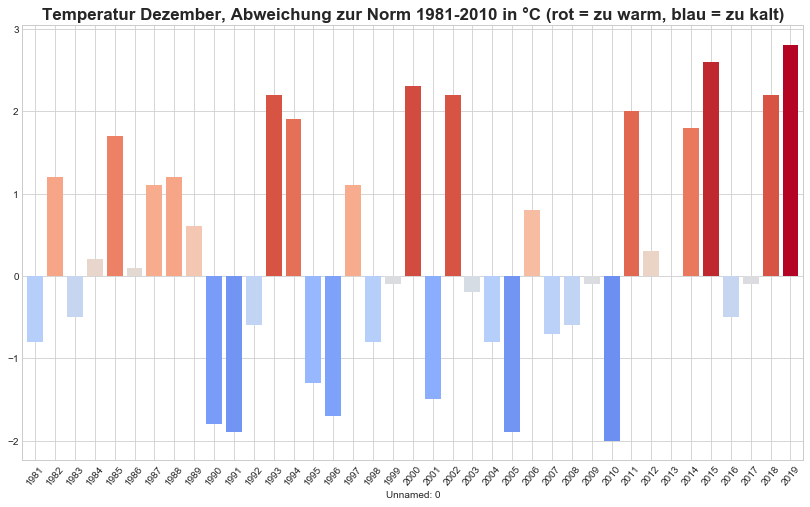

In [54]:
def line_format(label):
    month = label.month_name()[:3]
    year = label.year
    if month == 'dez':
        month = f'\n{label.year}'
    return year
grafiktemp2_12 = df_dez_abw_8110['Monatsmittel'].plot(kind='bar',figsize=(14,8), 
                                                      color=colors_neu12, rot=50, width=0.8)
grafiktemp2_12.set_xticklabels(map(lambda x: line_format(x), df_dez_abw_8110['Monatsmittel'].index))
title_font = {'fontsize': 17, 'fontweight': 'bold', 'fontname': 'Arial'}
grafiktemp2_12.set_title('Temperatur Dezember, Abweichung zur Norm 1981-2010 in °C (rot = zu warm, blau = zu kalt)', 
                      fontdict=title_font)
plt.style.use('seaborn-whitegrid')

# Berechnung der Tages-Durchschnittstemperatur seit 1981
Wie stark macht sich die Klimaerwärmung in der Zürichseeregion bemerkbar?

In [55]:
#mittel 61-90
df2 = pd.DataFrame({'jan': [-0.4],
 'feb': [1],
 'mar': [4.2],
 'apr': [8.1],
 'mai': [12.4],
 'jun': [15.7],
 'jul': [18],
 'aug': [17],
 'sep': [14.2],
 'okt': [9.5],
 'nov': [4.3],
 'dez': [0.7]},
index=[1])

In [56]:
#mittel 81-10
df3 = pd.DataFrame({'jan': [0.3],
 'feb': [1.2],
 'mar': [5.2],
 'apr': [9],
 'mai': [13.6],
 'jun': [16.8],
 'jul': [19],
 'aug': [18.3],
 'sep': [14.4],
 'okt': [10.2],
 'nov': [4.6],
 'dez': [1.6]},
index=[2])

In [57]:
#Neues Frame
frames = [df2,df3]
result = pd.concat(frames)

In [58]:
result

,jan,feb,mar,apr,mai,jun,jul,aug,sep,okt,nov,dez
1,-0.4,1.0,4.2,8.1,12.4,15.7,18,17.0,14.2,9.5,4.3,0.7
2,0.3,1.2,5.2,9.0,13.6,16.8,19,18.3,14.4,10.2,4.6,1.6


In [59]:
# Durchschnittliche Jahrestemperatur 1961-1990
result.loc[1].mean()

8.725

In [60]:
# Durchschnittliche Jahrestemperatur 1981-2010
result.loc[2].mean()

9.516666666666666

In [61]:
# Tages-Mean eines einzelnen Jahres berechnen
df_temp_only[df_temp_only.index.year == 2019].mean()

10.816666666666668

In [62]:
# Entwicklung der gemittelten Jahres-Durchschnittstemperatur an der Wetterstation Wädenswil seit 1981
df_year = pd.DataFrame({'1981':[df_temp_only[df_temp_only.index.year == 1981].mean()],
'1982':[df_temp_only[df_temp_only.index.year == 1982].mean()],
    '1983':[df_temp_only[df_temp_only.index.year == 1983].mean()],
        '1984':[df_temp_only[df_temp_only.index.year == 1984].mean()],
            '1985':[df_temp_only[df_temp_only.index.year == 1985].mean()],
                '1986':[df_temp_only[df_temp_only.index.year == 1986].mean()],
                    '1987':[df_temp_only[df_temp_only.index.year == 1987].mean()],
                       '1988':[df_temp_only[df_temp_only.index.year == 1988].mean()],
                        '1989':[df_temp_only[df_temp_only.index.year == 1989].mean()],
                        '1990':[df_temp_only[df_temp_only.index.year == 1990].mean()],
'1991':[df_temp_only[df_temp_only.index.year == 1991].mean()],
    '1992':[df_temp_only[df_temp_only.index.year == 1992].mean()],
        '1993':[df_temp_only[df_temp_only.index.year == 1993].mean()],
            '1994':[df_temp_only[df_temp_only.index.year == 1994].mean()],
                '1995':[df_temp_only[df_temp_only.index.year == 1995].mean()],
                    '1996':[df_temp_only[df_temp_only.index.year == 1996].mean()],
                       '1997':[df_temp_only[df_temp_only.index.year == 1997].mean()],
                       '1998':[df_temp_only[df_temp_only.index.year == 1998].mean()],
                       '1999':[df_temp_only[df_temp_only.index.year == 1999].mean()],
'2000':[df_temp_only[df_temp_only.index.year == 2000].mean()],
    '2001':[df_temp_only[df_temp_only.index.year == 2001].mean()],
        '2002':[df_temp_only[df_temp_only.index.year == 2002].mean()],
            '2003':[df_temp_only[df_temp_only.index.year == 2003].mean()],
                '2004':[df_temp_only[df_temp_only.index.year == 2004].mean()],
                    '2005':[df_temp_only[df_temp_only.index.year == 2005].mean()],
                       '2006':[df_temp_only[df_temp_only.index.year == 2006].mean()],
                       '2007':[df_temp_only[df_temp_only.index.year == 2007].mean()],
                       '2008':[df_temp_only[df_temp_only.index.year == 2008].mean()],
'2009':[df_temp_only[df_temp_only.index.year == 2009].mean()],
    '2010':[df_temp_only[df_temp_only.index.year == 2010].mean()],
        '2011':[df_temp_only[df_temp_only.index.year == 2011].mean()],
            '2012':[df_temp_only[df_temp_only.index.year == 2012].mean()],
                '2013':[df_temp_only[df_temp_only.index.year == 2013].mean()],
                    '2014':[df_temp_only[df_temp_only.index.year == 2014].mean()],
                       '2015':[df_temp_only[df_temp_only.index.year == 2015].mean()],
                       '2016':[df_temp_only[df_temp_only.index.year == 2016].mean()],
'2017':[df_temp_only[df_temp_only.index.year == 2017].mean()],
    '2018':[df_temp_only[df_temp_only.index.year == 2018].mean()],
        '2019':[df_temp_only[df_temp_only.index.year == 2019].mean()]},
                       index=[1])

In [63]:
df_year

,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,8.783333,9.458333,9.475,8.458333,8.425,8.725,8.683333,9.725,9.575,9.783333,...,9.1,10.733333,10.033333,9.441667,10.875,10.766667,10.325,10.458333,11.425,10.816667


In [64]:
#Swappen und umbenennen
df_year.swapaxes("index", "columns")
df_yearnew = df_year.swapaxes("index", "columns")

In [65]:
df_yearnew.rename(columns={1:'Temperatur in Grad'}, inplace=True)

In [66]:
print(df_yearnew.columns)

Index(['Temperatur in Grad'], dtype='object')


Text(0.5, 1.0, 'Jährliche Tages-Durchschnittstemperatur in Wädenswil seit 1981')

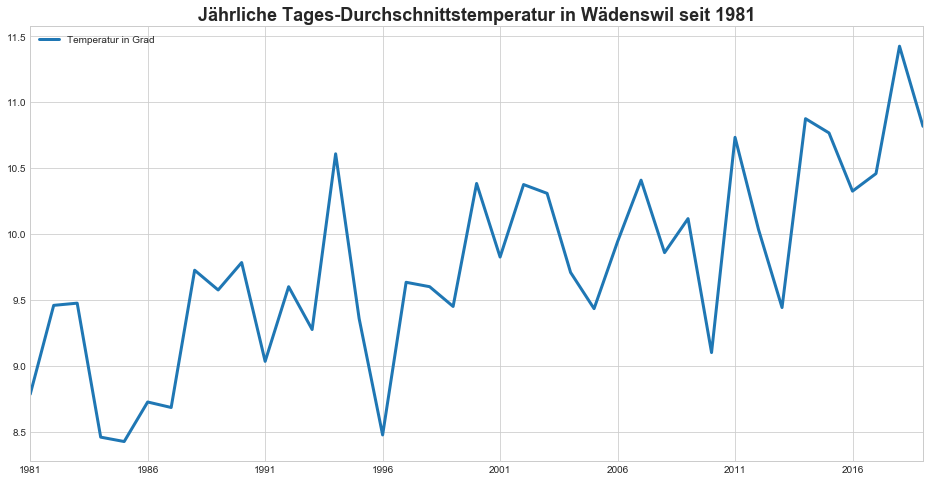

In [67]:
grafik = df_yearnew.plot(figsize=(16,8), grid=True, linewidth=3)
title_font = {'fontsize': 18, 'fontweight': 'bold', 'fontname': 'Arial'}
grafik.set_title('Jährliche Tages-Durchschnittstemperatur in Wädenswil seit 1981', fontdict=title_font)

# Tageswerte (Temperatur)

Ziel: Ich will heraufiltern, wie und ob sich ich die Extremwerte (Tages-Minima, Tages-Maxima) im Sommer und Winter seit 1981 verändert haben. Vermutung: Die Kältewerte haben abgenommen, die Hitzewerte zugenommen. Dafür nehmen ich den grösseren Datensatz mit den Tageswerten (Min/Max).

In [68]:
#Zuerst isoliere ich die Winterwerte (Dezember, Januar, Februar)
df_day_winter = df_day[(df_day['Monat'] == 1) | (df_day['Monat'] == 2) | (df_day['Monat'] == 12)]

In [69]:
#Dann die Sommerwerte (Juni, Juli, August)
df_day_summer = df_day[(df_day['Monat'] == 6) | (df_day['Monat'] == 7) | (df_day['Monat'] == 8)]

# Winter

In [70]:
#df_day_winter['Min'].plot(kind='bar', figsize=(16,8))

Problem: Die obige Grafik ist wenig aussagekräftig.
=> Idee: In der Klimatologie ist es üblich, aus sämtlichen Tages-Minimumwerten eines Winters die sogenannte Kältesumme zu errechnen. Diese zeigt auf, wie "frostig" ein Winter insgesamt war. Ich berechne also für jeden Winter (Jan, Feb, Dez) seit 1981 diese Kältesumme und stelle das dann grafisch dar. 

In [71]:
df_day_winter.loc[df_day_winter['Jahr'] == 1981]
df_winter1981 = df_day_winter.loc[df_day_winter['Jahr'] == 1981]

In [72]:
df_winter1981['Min'].sum()

-321.3

In [73]:
df_day_winter.loc[df_day_winter['Jahr'] == 1981]['Min'].sum()

-321.3

In [74]:
#Neues Dataframe mit den Kältesummen aller Winter Seit 1981 erstellen
df_winter_sum = pd.DataFrame({'1981':[df_day_winter.loc[df_day_winter['Jahr'] == 1981]['Min'].sum()],
                             '1982':[df_day_winter.loc[df_day_winter['Jahr'] == 1982]['Min'].sum()],
                              '1983':[df_day_winter.loc[df_day_winter['Jahr'] == 1983]['Min'].sum()],
                              '1984':[df_day_winter.loc[df_day_winter['Jahr'] == 1984]['Min'].sum()],
                              '1985':[df_day_winter.loc[df_day_winter['Jahr'] == 1985]['Min'].sum()],
                              '1986':[df_day_winter.loc[df_day_winter['Jahr'] == 1986]['Min'].sum()],
                              '1987':[df_day_winter.loc[df_day_winter['Jahr'] == 1987]['Min'].sum()],
                              '1988':[df_day_winter.loc[df_day_winter['Jahr'] == 1988]['Min'].sum()],
                              '1989':[df_day_winter.loc[df_day_winter['Jahr'] == 1989]['Min'].sum()],
                              '1990':[df_day_winter.loc[df_day_winter['Jahr'] == 1990]['Min'].sum()],
                              '1991':[df_day_winter.loc[df_day_winter['Jahr'] == 1991]['Min'].sum()],
                              '1992':[df_day_winter.loc[df_day_winter['Jahr'] == 1992]['Min'].sum()],
                              '1993':[df_day_winter.loc[df_day_winter['Jahr'] == 1993]['Min'].sum()],
                              '1994':[df_day_winter.loc[df_day_winter['Jahr'] == 1994]['Min'].sum()],
                              '1995':[df_day_winter.loc[df_day_winter['Jahr'] == 1995]['Min'].sum()],
                              '1996':[df_day_winter.loc[df_day_winter['Jahr'] == 1996]['Min'].sum()],
                              '1997':[df_day_winter.loc[df_day_winter['Jahr'] == 1997]['Min'].sum()],
                              '1998':[df_day_winter.loc[df_day_winter['Jahr'] == 1998]['Min'].sum()],
                              '1999':[df_day_winter.loc[df_day_winter['Jahr'] == 1999]['Min'].sum()],
                              '2000':[df_day_winter.loc[df_day_winter['Jahr'] == 2000]['Min'].sum()],
                              '2001':[df_day_winter.loc[df_day_winter['Jahr'] == 2001]['Min'].sum()],
                              '2002':[df_day_winter.loc[df_day_winter['Jahr'] == 2002]['Min'].sum()],
                              '2003':[df_day_winter.loc[df_day_winter['Jahr'] == 2003]['Min'].sum()],
                              '2004':[df_day_winter.loc[df_day_winter['Jahr'] == 2004]['Min'].sum()],
                              '2005':[df_day_winter.loc[df_day_winter['Jahr'] == 2005]['Min'].sum()],
                              '2006':[df_day_winter.loc[df_day_winter['Jahr'] == 2006]['Min'].sum()],
                              '2007':[df_day_winter.loc[df_day_winter['Jahr'] == 2007]['Min'].sum()],
                              '2008':[df_day_winter.loc[df_day_winter['Jahr'] == 2008]['Min'].sum()],
                              '2009':[df_day_winter.loc[df_day_winter['Jahr'] == 2009]['Min'].sum()],
                              '2010':[df_day_winter.loc[df_day_winter['Jahr'] == 2010]['Min'].sum()],
                              '2011':[df_day_winter.loc[df_day_winter['Jahr'] == 2011]['Min'].sum()],
                              '2012':[df_day_winter.loc[df_day_winter['Jahr'] == 2012]['Min'].sum()],
                              '2013':[df_day_winter.loc[df_day_winter['Jahr'] == 2013]['Min'].sum()],
                              '2014':[df_day_winter.loc[df_day_winter['Jahr'] == 2014]['Min'].sum()],
                              '2015':[df_day_winter.loc[df_day_winter['Jahr'] == 2015]['Min'].sum()],
                              '2016':[df_day_winter.loc[df_day_winter['Jahr'] == 2016]['Min'].sum()],
                              '2017':[df_day_winter.loc[df_day_winter['Jahr'] == 2017]['Min'].sum()],
                              '2018':[df_day_winter.loc[df_day_winter['Jahr'] == 2018]['Min'].sum()],
                              '2019':[df_day_winter.loc[df_day_winter['Jahr'] == 2019]['Min'].sum()],},
                             index=[1])

In [75]:
df_winter_sum

,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,-321.3,-115.5,-188.0,-141.4,-337.9,-277.4,-209.3,7.6,-44.0,-86.9,...,-246.5,13.6,-179.5,-167.2,84.2,-35.6,20.2,-146.1,54.7,-32.9


In [76]:
df_winter_sum.swapaxes("index", "columns")
df_winter_sum2 = df_winter_sum.swapaxes("index", "columns")

In [77]:
df_winter_sum2.rename(columns={1:'Kältesumme in Grad'}, inplace=True)

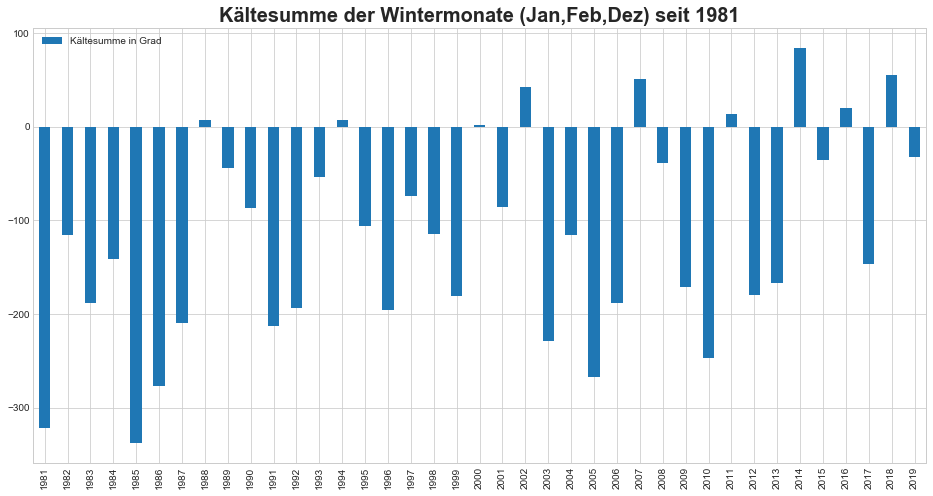

In [78]:
grafiksum = df_winter_sum2.plot(kind='bar', figsize=(16,8), grid=True)
title_font = {'fontsize': 20, 'fontweight': 'bold', 'fontname': 'Arial'}
grafiksum.set_title('Kältesumme der Wintermonate (Jan,Feb,Dez) seit 1981', fontdict=title_font)
plt.style.use('seaborn-whitegrid')

Fazit: Bis Ende der 80er Jahre weisen die meisten Winter eine markant negative Kältsumme auf. Ab Beginn der 2000er Jahre werden Winter mit markanten Kältesummen (unter -200 Grad) seltener, geichzeitig häufen sich Winter, die wegen der milden Temperaturen sogar eine positive Kältesumme aufweisen. Grund: Die Plusgrade "übersteuern" die Minusgrade.

# Sommer

Wie hat sich die Anzahl der Hitzetage (Tage mit Max-Temperatur über 30 Grad) im Sommer (Jun, Jul, Aug) seit 1981 verändert?

In [79]:
df_day_summer

,Jahr,Monat,Tag,Min,Max
151,1981,6,1,14.5,27.9
152,1981,6,2,14.5,29.4
153,1981,6,3,14.3,24.7
154,1981,6,4,10.3,14.1
155,1981,6,5,9.4,20.8
...,...,...,...,...,...
14117,2019,8,27,15.0,28.1
14118,2019,8,28,19.0,27.2
14119,2019,8,29,16.5,23.7
14120,2019,8,30,15.1,27.4


In [80]:
df_day_summer[df_day_summer['Jahr'] == 1981]['Max']

151    27.9
152    29.4
153    24.7
154    14.1
155    20.8
       ... 
238    22.4
239    22.9
240    22.7
241    23.5
242    23.7
Name: Max, Length: 92, dtype: float64

In [81]:
#Loop durch das Sommer-Dataframe, um alle Tages-Maxima über 30 Grad zu finden.
dheat = []
for index, row in df_day_summer[(df_day_summer['Max'] >= 30)].iterrows():
    print(index, row['Jahr'], row['Monat'], row['Tag'], row['Max'])
    dheat.append((index, row['Jahr'],row['Monat'],row['Tag'], row['Max']))

927 1983.0 7.0 17.0 31.1
928 1983.0 7.0 18.0 30.8
929 1983.0 7.0 19.0 32.2
930 1983.0 7.0 20.0 30.1
932 1983.0 7.0 22.0 30.3
933 1983.0 7.0 23.0 32.8
935 1983.0 7.0 25.0 30.6
936 1983.0 7.0 26.0 34.1
937 1983.0 7.0 27.0 34.9
938 1983.0 7.0 28.0 33.1
939 1983.0 7.0 29.0 30.3
940 1983.0 7.0 30.0 31.3
941 1983.0 7.0 31.0 35.5
1285 1984.0 7.0 9.0 30.5
1286 1984.0 7.0 10.0 31.6
1287 1984.0 7.0 11.0 34.8
1306 1984.0 7.0 30.0 30.2
1307 1984.0 7.0 31.0 30.9
1655 1985.0 7.0 14.0 31.4
1667 1985.0 7.0 26.0 31.8
1686 1985.0 8.0 14.0 31.1
1999 1986.0 6.0 23.0 30.6
2004 1986.0 6.0 28.0 30.2
2040 1986.0 8.0 3.0 32.8
2371 1987.0 6.0 30.0 30.5
2416 1987.0 8.0 14.0 30.4
2419 1987.0 8.0 17.0 30.4
2760 1988.0 7.0 23.0 31.8
2782 1988.0 8.0 14.0 30.0
3488 1990.0 7.0 21.0 30.1
3489 1990.0 7.0 22.0 30.3
3495 1990.0 7.0 28.0 32.7
3500 1990.0 8.0 2.0 30.2
3503 1990.0 8.0 5.0 31.5
3511 1990.0 8.0 13.0 30.0
3843 1991.0 7.0 11.0 31.9
3844 1991.0 7.0 12.0 31.6
3870 1991.0 8.0 7.0 32.1
3885 1991.0 8.0 22.0 30.4
4218

In [82]:
df_summerheat = pd.DataFrame(dheat)

In [83]:
df_summerheat

,0,1,2,3,4
0,927,1983.0,7.0,17.0,31.1
1,928,1983.0,7.0,18.0,30.8
2,929,1983.0,7.0,19.0,32.2
3,930,1983.0,7.0,20.0,30.1
4,932,1983.0,7.0,22.0,30.3
...,...,...,...,...,...
260,14083,2019.0,7.0,24.0,33.7
261,14084,2019.0,7.0,25.0,34.1
262,14085,2019.0,7.0,26.0,32.2
263,14099,2019.0,8.0,9.0,31.1


In [84]:
df_summerheat.drop(columns=[0])

,1,2,3,4
0,1983.0,7.0,17.0,31.1
1,1983.0,7.0,18.0,30.8
2,1983.0,7.0,19.0,32.2
3,1983.0,7.0,20.0,30.1
4,1983.0,7.0,22.0,30.3
...,...,...,...,...
260,2019.0,7.0,24.0,33.7
261,2019.0,7.0,25.0,34.1
262,2019.0,7.0,26.0,32.2
263,2019.0,8.0,9.0,31.1


In [85]:
df_summerheat1 = df_summerheat.drop(columns=[0])

In [86]:
df_summerheat1.rename(columns={1:'Jahr',2:'Monat',3:'Tag',4:'Temperatur'}, inplace=False)

,Jahr,Monat,Tag,Temperatur
0,1983.0,7.0,17.0,31.1
1,1983.0,7.0,18.0,30.8
2,1983.0,7.0,19.0,32.2
3,1983.0,7.0,20.0,30.1
4,1983.0,7.0,22.0,30.3
...,...,...,...,...
260,2019.0,7.0,24.0,33.7
261,2019.0,7.0,25.0,34.1
262,2019.0,7.0,26.0,32.2
263,2019.0,8.0,9.0,31.1


In [87]:
df_summerheat2 = df_summerheat1.rename(columns={1:'Jahr',2:'Monat',3:'Tag',4:'Temperatur'}, inplace=False)

In [88]:
df_summerheat2

,Jahr,Monat,Tag,Temperatur
0,1983.0,7.0,17.0,31.1
1,1983.0,7.0,18.0,30.8
2,1983.0,7.0,19.0,32.2
3,1983.0,7.0,20.0,30.1
4,1983.0,7.0,22.0,30.3
...,...,...,...,...
260,2019.0,7.0,24.0,33.7
261,2019.0,7.0,25.0,34.1
262,2019.0,7.0,26.0,32.2
263,2019.0,8.0,9.0,31.1


In [89]:
#Welches sind die 20 heissesten seit 1981 in Wädenswil gemessenen Temperaturen?
df_summerheat2.sort_values("Temperatur", ascending=False).head(20)

,Jahr,Monat,Tag,Temperatur
113,2003.0,8.0,13.0,35.5
12,1983.0,7.0,31.0,35.5
8,1983.0,7.0,27.0,34.9
15,1984.0,7.0,11.0,34.8
96,2003.0,6.0,23.0,34.7
252,2019.0,6.0,26.0,34.6
180,2013.0,7.0,27.0,34.5
256,2019.0,6.0,30.0,34.4
194,2015.0,7.0,2.0,34.3
197,2015.0,7.0,5.0,34.3


In [90]:
df_summerheat2.loc[df_summerheat2['Jahr'] == 1983]['Temperatur'].count()

13

In [91]:
#Neues Dataframe mit der Anzahl Hitzetage pro Jahr seit 1981
df_heat_sum = pd.DataFrame({'1981':[df_summerheat2.loc[df_summerheat2['Jahr'] == 1981]['Temperatur'].count()],
                             '1982':[df_summerheat2.loc[df_summerheat2['Jahr'] == 1982]['Temperatur'].count()],
                              '1983':[df_summerheat2.loc[df_summerheat2['Jahr'] == 1983]['Temperatur'].count()],
                              '1984':[df_summerheat2.loc[df_summerheat2['Jahr'] == 1984]['Temperatur'].count()],
                              '1985':[df_summerheat2.loc[df_summerheat2['Jahr'] == 1985]['Temperatur'].count()],
                              '1986':[df_summerheat2.loc[df_summerheat2['Jahr'] == 1986]['Temperatur'].count()],
                              '1987':[df_summerheat2.loc[df_summerheat2['Jahr'] == 1987]['Temperatur'].count()],
                              '1988':[df_summerheat2.loc[df_summerheat2['Jahr'] == 1988]['Temperatur'].count()],
                              '1989':[df_summerheat2.loc[df_summerheat2['Jahr'] == 1989]['Temperatur'].count()],
                              '1990':[df_summerheat2.loc[df_summerheat2['Jahr'] == 1990]['Temperatur'].count()],
                              '1991':[df_summerheat2.loc[df_summerheat2['Jahr'] == 1991]['Temperatur'].count()],
                              '1992':[df_summerheat2.loc[df_summerheat2['Jahr'] == 1992]['Temperatur'].count()],
                              '1993':[df_summerheat2.loc[df_summerheat2['Jahr'] == 1993]['Temperatur'].count()],
                              '1994':[df_summerheat2.loc[df_summerheat2['Jahr'] == 1994]['Temperatur'].count()],
                              '1995':[df_summerheat2.loc[df_summerheat2['Jahr'] == 1995]['Temperatur'].count()],
                              '1996':[df_summerheat2.loc[df_summerheat2['Jahr'] == 1996]['Temperatur'].count()],
                              '1997':[df_summerheat2.loc[df_summerheat2['Jahr'] == 1997]['Temperatur'].count()],
                              '1998':[df_summerheat2.loc[df_summerheat2['Jahr'] == 1998]['Temperatur'].count()],
                              '1999':[df_summerheat2.loc[df_summerheat2['Jahr'] == 1999]['Temperatur'].count()],
                              '2000':[df_summerheat2.loc[df_summerheat2['Jahr'] == 2000]['Temperatur'].count()],
                              '2001':[df_summerheat2.loc[df_summerheat2['Jahr'] == 2001]['Temperatur'].count()],
                              '2002':[df_summerheat2.loc[df_summerheat2['Jahr'] == 2002]['Temperatur'].count()],
                              '2003':[df_summerheat2.loc[df_summerheat2['Jahr'] == 2003]['Temperatur'].count()],
                              '2004':[df_summerheat2.loc[df_summerheat2['Jahr'] == 2004]['Temperatur'].count()],
                              '2005':[df_summerheat2.loc[df_summerheat2['Jahr'] == 2005]['Temperatur'].count()],
                              '2006':[df_summerheat2.loc[df_summerheat2['Jahr'] == 2006]['Temperatur'].count()],
                              '2007':[df_summerheat2.loc[df_summerheat2['Jahr'] == 2007]['Temperatur'].count()],
                              '2008':[df_summerheat2.loc[df_summerheat2['Jahr'] == 2008]['Temperatur'].count()],
                              '2009':[df_summerheat2.loc[df_summerheat2['Jahr'] == 2009]['Temperatur'].count()],
                              '2010':[df_summerheat2.loc[df_summerheat2['Jahr'] == 2010]['Temperatur'].count()],
                              '2011':[df_summerheat2.loc[df_summerheat2['Jahr'] == 2011]['Temperatur'].count()],
                              '2012':[df_summerheat2.loc[df_summerheat2['Jahr'] == 2012]['Temperatur'].count()],
                              '2013':[df_summerheat2.loc[df_summerheat2['Jahr'] == 2013]['Temperatur'].count()],
                              '2014':[df_summerheat2.loc[df_summerheat2['Jahr'] == 2014]['Temperatur'].count()],
                              '2015':[df_summerheat2.loc[df_summerheat2['Jahr'] == 2015]['Temperatur'].count()],
                              '2016':[df_summerheat2.loc[df_summerheat2['Jahr'] == 2016]['Temperatur'].count()],
                              '2017':[df_summerheat2.loc[df_summerheat2['Jahr'] == 2017]['Temperatur'].count()],
                              '2018':[df_summerheat2.loc[df_summerheat2['Jahr'] == 2018]['Temperatur'].count()],
                              '2019':[df_summerheat2.loc[df_summerheat2['Jahr'] == 2019]['Temperatur'].count()],},
                             index=[1])

In [92]:
df_heat_sum

,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,0,0,13,5,3,3,3,2,0,6,...,10,8,7,12,5,22,8,13,16,15


In [93]:
df_heat_sum.swapaxes("index", "columns")
df_heat_sum1 = df_heat_sum.swapaxes("index", "columns")

In [94]:
df_heat_sum1

,1
1981,0
1982,0
1983,13
1984,5
1985,3
1986,3
1987,3
1988,2
1989,0
1990,6


In [95]:
df_heat_sum1.rename(columns={1:'Anzahl Hitzetage'}, inplace=True)

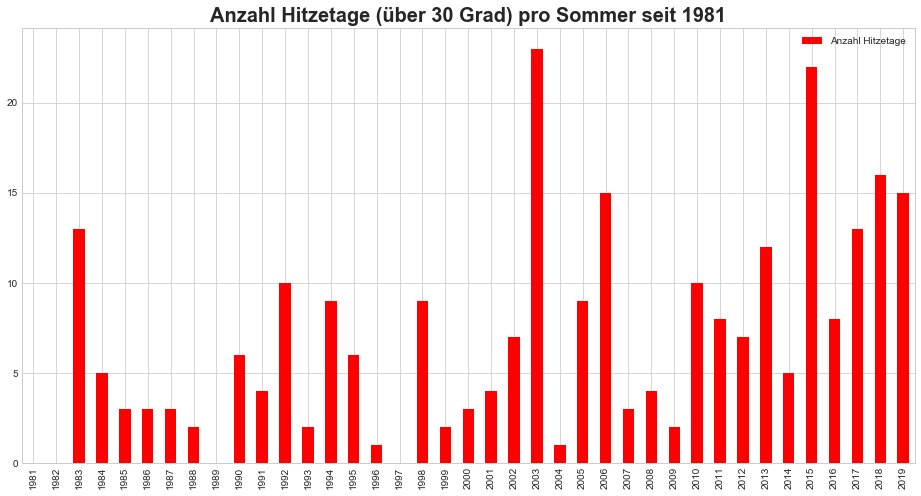

In [96]:
grafikheatsum = df_heat_sum1.plot(kind='bar', figsize=(16,8), grid=True, color='red')
title_font = {'fontsize': 20, 'fontweight': 'bold', 'fontname': 'Arial'}
grafikheatsum.set_title('Anzahl Hitzetage (über 30 Grad) pro Sommer seit 1981', fontdict=title_font)
plt.style.use('seaborn-whitegrid')

Fazit: Die Anzahl Hitzetage (über 30 Grad) pro Sommer (Jun,Jul,Aug) hat v.a. seit Beginn der 2000er Jahre merklich zugenommen. Von den 20 heissesten jemals in Wädenswil gemessenen Temperatur-Tagesmaxima wurden 16 in den 2000er-Jahren gemessen.

# Niederschlag 1961 bis 2010

In [97]:
df_ns_only

Unnamed: 0
1961-01-01     86.7
1961-02-01    109.2
1961-03-01     56.3
1961-04-01     96.5
1961-05-01    187.1
              ...  
2019-08-01    155.6
2019-09-01    126.9
2019-10-01    174.5
2019-11-01    102.0
2019-12-01     89.4
Name: Monatssumme, Length: 708, dtype: float64

In [98]:
#Dataframe Niederschlag Norm 1961-1990
mean_ns6190 = pd.DataFrame({'jan':[91],'feb':[85],'mar':[93],'apr':[108],'mai':[129],
                            'jun':[151],'jul':[148],'aug':[157],'sep':[108],
                            'okt':[86],'nov':[101],'dez':[96]},index=[0])

In [99]:
#Dataframe Niederschlag Norm 1981-2010
mean_ns8110 = pd.DataFrame({'jan':[82],'feb':[77],'mar':[99],'apr':[100],'mai':[135],
                            'jun':[155],'jul':[152],'aug':[164],'sep':[127],
                            'okt':[100],'nov':[98],'dez':[102]},index=[1])

In [100]:
#Neues Frame mit concat
rainframes = [mean_ns6190,mean_ns8110]
rainresult = pd.concat(rainframes)

In [101]:
rainresult

,jan,feb,mar,apr,mai,jun,jul,aug,sep,okt,nov,dez
0,91,85,93,108,129,151,148,157,108,86,101,96
1,82,77,99,100,135,155,152,164,127,100,98,102


In [102]:
#Summe Norm 1961-90
rainresult.loc[0].sum()

1353

In [103]:
#Summe Norm 1981-10
rainresult.loc[1].sum()

1391

In [104]:
df_rain = pd.DataFrame({'1961':[df_ns_only[df_ns_only.index.year == 1961].sum()],
'1962':[df_ns_only[df_ns_only.index.year == 1962].sum()],
    '1963':[df_ns_only[df_ns_only.index.year == 1963].sum()],
        '1964':[df_ns_only[df_ns_only.index.year == 1964].sum()],
            '1965':[df_ns_only[df_ns_only.index.year == 1965].sum()],
                '1966':[df_ns_only[df_ns_only.index.year == 1966].sum()],
                    '1967':[df_ns_only[df_ns_only.index.year == 1967].sum()],
                       '1968':[df_ns_only[df_ns_only.index.year == 1968].sum()],
                        '1969':[df_ns_only[df_ns_only.index.year == 1969].sum()],
                        '1970':[df_ns_only[df_ns_only.index.year == 1970].sum()],
                        '1971':[df_ns_only[df_ns_only.index.year == 1971].sum()],
'1972':[df_ns_only[df_ns_only.index.year == 1972].sum()],
    '1973':[df_ns_only[df_ns_only.index.year == 1973].sum()],
        '1974':[df_ns_only[df_ns_only.index.year == 1974].sum()],
            '1975':[df_ns_only[df_ns_only.index.year == 1975].sum()],
                '1976':[df_ns_only[df_ns_only.index.year == 1976].sum()],
                    '1977':[df_ns_only[df_ns_only.index.year == 1977].sum()],
                       '1978':[df_ns_only[df_ns_only.index.year == 1978].sum()],
                        '1979':[df_ns_only[df_ns_only.index.year == 1979].sum()],
                        '1980':[df_ns_only[df_ns_only.index.year == 1980].sum()],
                        '1981':[df_ns_only[df_ns_only.index.year == 1981].sum()],
'1982':[df_ns_only[df_ns_only.index.year == 1982].sum()],
    '1983':[df_ns_only[df_ns_only.index.year == 1983].sum()],
        '1984':[df_ns_only[df_ns_only.index.year == 1984].sum()],
            '1985':[df_ns_only[df_ns_only.index.year == 1985].sum()],
                '1986':[df_ns_only[df_ns_only.index.year == 1986].sum()],
                    '1987':[df_ns_only[df_ns_only.index.year == 1987].sum()],
                       '1988':[df_ns_only[df_ns_only.index.year == 1988].sum()],
                        '1989':[df_ns_only[df_ns_only.index.year == 1989].sum()],
                        '1990':[df_ns_only[df_ns_only.index.year == 1990].sum()],
'1991':[df_ns_only[df_ns_only.index.year == 1991].sum()],
    '1992':[df_ns_only[df_ns_only.index.year == 1992].sum()],
        '1993':[df_ns_only[df_ns_only.index.year == 1993].sum()],
            '1994':[df_ns_only[df_ns_only.index.year == 1994].sum()],
                '1995':[df_ns_only[df_ns_only.index.year == 1995].sum()],
                    '1996':[df_ns_only[df_ns_only.index.year == 1996].sum()],
                       '1997':[df_ns_only[df_ns_only.index.year == 1997].sum()],
                       '1998':[df_ns_only[df_ns_only.index.year == 1998].sum()],
                       '1999':[df_ns_only[df_ns_only.index.year == 1999].sum()],
'2000':[df_ns_only[df_ns_only.index.year == 2000].sum()],
    '2001':[df_ns_only[df_ns_only.index.year == 2001].sum()],
        '2002':[df_ns_only[df_ns_only.index.year == 2002].sum()],
            '2003':[df_ns_only[df_ns_only.index.year == 2003].sum()],
                '2004':[df_ns_only[df_ns_only.index.year == 2004].sum()],
                    '2005':[df_ns_only[df_ns_only.index.year == 2005].sum()],
                       '2006':[df_ns_only[df_ns_only.index.year == 2006].sum()],
                       '2007':[df_ns_only[df_ns_only.index.year == 2007].sum()],
                       '2008':[df_ns_only[df_ns_only.index.year == 2008].sum()],
'2009':[df_ns_only[df_ns_only.index.year == 2009].sum()],
    '2010':[df_ns_only[df_ns_only.index.year == 2010].sum()],
        '2011':[df_ns_only[df_ns_only.index.year == 2011].sum()],
            '2012':[df_ns_only[df_ns_only.index.year == 2012].sum()],
                '2013':[df_ns_only[df_ns_only.index.year == 2013].sum()],
                    '2014':[df_ns_only[df_ns_only.index.year == 2014].sum()],
                       '2015':[df_ns_only[df_ns_only.index.year == 2015].sum()],
                       '2016':[df_ns_only[df_ns_only.index.year == 2016].sum()],
'2017':[df_ns_only[df_ns_only.index.year == 2017].sum()],
    '2018':[df_ns_only[df_ns_only.index.year == 2018].sum()],
        '2019':[df_ns_only[df_ns_only.index.year == 2019].sum()]},
                       index=[1])

In [105]:
df_rain.swapaxes("index", "columns")
df_rainnew = df_rain.swapaxes("index", "columns")

In [106]:
df_rainnew.rename(columns={1:'Jährliche Regensumme'}, inplace=True)

Text(0.5, 1.0, 'Jährliche Regensumme in Wädenswil seit 1981')

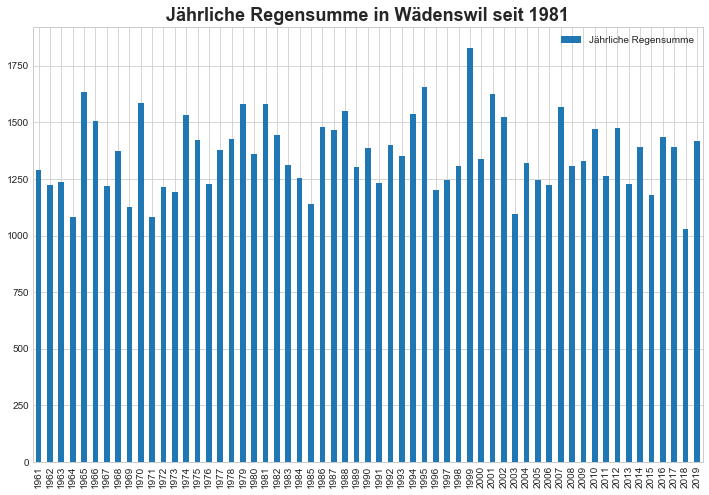

In [107]:
grafikrain = df_rainnew.plot(kind='bar',figsize=(12,8),grid=True)
title_font = {'fontsize': 18, 'fontweight': 'bold', 'fontname': 'Arial'}
grafikrain.set_title('Jährliche Regensumme in Wädenswil seit 1981', fontdict=title_font)

In [108]:
#monate in separaten Frames speichern und dataframes draus machen
dfns_jan = pd.DataFrame(df_ns_only[df_ns_only.index.month == 1])
dfns_feb = pd.DataFrame(df_ns_only[df_ns_only.index.month == 2])
dfns_mar = pd.DataFrame(df_ns_only[df_ns_only.index.month == 3])
dfns_apr = pd.DataFrame(df_ns_only[df_ns_only.index.month == 4])
dfns_mai = pd.DataFrame(df_ns_only[df_ns_only.index.month == 5])
dfns_jun = pd.DataFrame(df_ns_only[df_ns_only.index.month == 6])
dfns_jul = pd.DataFrame(df_ns_only[df_ns_only.index.month == 7])
dfns_aug = pd.DataFrame(df_ns_only[df_ns_only.index.month == 8])
dfns_sep = pd.DataFrame(df_ns_only[df_ns_only.index.month == 9])
dfns_okt = pd.DataFrame(df_ns_only[df_ns_only.index.month == 10])
dfns_nov = pd.DataFrame(df_ns_only[df_ns_only.index.month == 11])
dfns_dez = pd.DataFrame(df_ns_only[df_ns_only.index.month == 12])

In [109]:
#Prozentuale Abweichung im Vergeich zum Mittelwert 1961-1990 berechnen für Januar bis Dezember
dfnsjan_abw6190 = dfns_jan*100/91
dfnsfeb_abw6190 = dfns_feb*100/85
dfnsmar_abw6190 = dfns_mar*100/93
dfnsapr_abw6190 = dfns_apr*100/108
dfnsmai_abw6190 = dfns_mai*100/129
dfnsjun_abw6190 = dfns_jun*100/151
dfnsjul_abw6190 = dfns_jul*100/148
dfnsaug_abw6190 = dfns_aug*100/157
dfnssep_abw6190 = dfns_sep*100/108
dfnsokt_abw6190 = dfns_okt*100/86
dfnsnov_abw6190 = dfns_nov*100/101
dfnsdez_abw6190 = dfns_dez*100/96

In [110]:
#Prozentuale Abweichung im Vergeich zum Mittelwert 1981-2010 berechnen für Januar bis Dezember
dfnsjan_abw8110 = dfns_jan*100/82
dfnsfeb_abw8110 = dfns_feb*100/77
dfnsmar_abw8110 = dfns_mar*100/99
dfnsapr_abw8110 = dfns_apr*100/100
dfnsmai_abw8110 = dfns_mai*100/135
dfnsjun_abw8110 = dfns_jun*100/155
dfnsjul_abw8110 = dfns_jul*100/152
dfnsaug_abw8110 = dfns_aug*100/164
dfnssep_abw8110 = dfns_sep*100/127
dfnsokt_abw8110 = dfns_okt*100/100
dfnsnov_abw8110 = dfns_nov*100/98
dfnsdez_abw8110 = dfns_dez*100/102

# Januar

In [111]:
minirain1 = dfnsjan_abw8110['Monatssumme'].min()
maxirain1 = dfnsjan_abw8110['Monatssumme'].max()-25

In [112]:
normingrain1 = matplotlib.colors.Normalize(vmin=minirain1, vmax=maxirain1, clip=True)

In [113]:
farbschema = plt.cm.cividis_r

In [114]:
mapperrain1 = plt.cm.ScalarMappable(norm=normingrain1, cmap=farbschema)

In [115]:
raincolors1 = dfnsjan_abw8110['Monatssumme'].apply(lambda x: mcolors.to_hex(mapperrain1.to_rgba(x)))

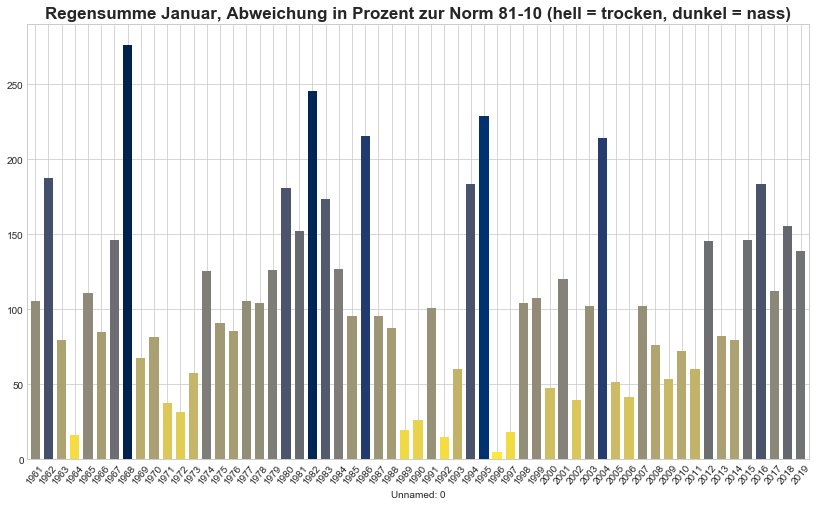

In [116]:
def line_format(label):
    month = label.month_name()[:3]
    year = label.year
    if month == 'jan':
        month = f'\n{label.year}'
    return year
grafikrain1 = dfnsjan_abw8110['Monatssumme'].plot(kind='bar',figsize=(14,8), 
                                                  color=raincolors1, rot=50, width=0.7)
grafikrain1.set_xticklabels(map(lambda x: line_format(x), dfnsjan_abw8110['Monatssumme'].index))
title_font = {'fontsize': 17, 'fontweight': 'bold', 'fontname': 'Arial'}
grafikrain1.set_title('Regensumme Januar, Abweichung in Prozent zur Norm 81-10 (hell = trocken, dunkel = nass)', 
                      fontdict=title_font)
plt.style.use('seaborn-whitegrid')

# Februar

In [117]:
minirain2 = dfnsfeb_abw8110['Monatssumme'].min()
maxirain2 = dfnsfeb_abw8110['Monatssumme'].max()-187

In [118]:
normingrain2 = matplotlib.colors.Normalize(vmin=minirain2, vmax=maxirain2, clip=True)

In [119]:
farbschema = plt.cm.cividis_r

In [120]:
mapperrain2 = plt.cm.ScalarMappable(norm=normingrain2, cmap=farbschema)

In [121]:
raincolors2 = dfnsfeb_abw8110['Monatssumme'].apply(lambda x: mcolors.to_hex(mapperrain2.to_rgba(x)))

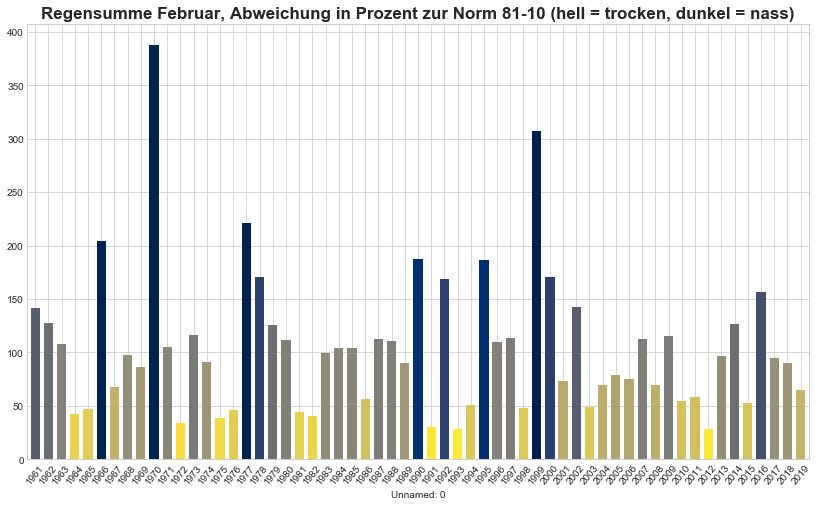

In [122]:
def line_format(label):
    month = label.month_name()[:3]
    year = label.year
    if month == 'feb':
        month = f'\n{label.year}'
    return year
grafikrain2 = dfnsfeb_abw8110['Monatssumme'].plot(kind='bar',figsize=(14,8), 
                                                  color=raincolors2, rot=50, width=0.7)
grafikrain2.set_xticklabels(map(lambda x: line_format(x), dfnsfeb_abw8110['Monatssumme'].index))
title_font = {'fontsize': 17, 'fontweight': 'bold', 'fontname': 'Arial'}
grafikrain2.set_title('Regensumme Februar, Abweichung in Prozent zur Norm 81-10 (hell = trocken, dunkel = nass)', 
                      fontdict=title_font)
plt.style.use('seaborn-whitegrid')

# März

In [123]:
minirain3 = dfnsmar_abw8110['Monatssumme'].min()
maxirain3 = dfnsmar_abw8110['Monatssumme'].max()+8

In [124]:
normingrain3 = matplotlib.colors.Normalize(vmin=minirain3, vmax=maxirain3, clip=True)

In [125]:
farbschema = plt.cm.cividis_r

In [126]:
mapperrain3 = plt.cm.ScalarMappable(norm=normingrain3, cmap=farbschema)

In [127]:
raincolors3 = dfnsmar_abw8110['Monatssumme'].apply(lambda x: mcolors.to_hex(mapperrain3.to_rgba(x)))

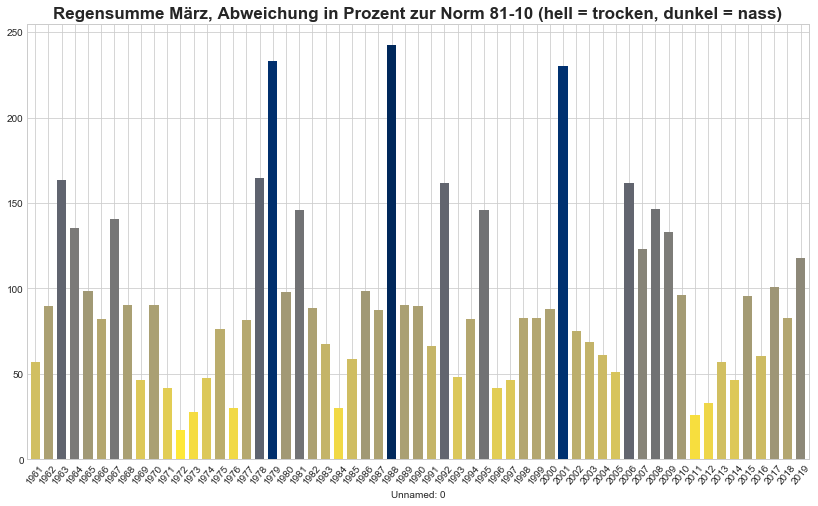

In [128]:
def line_format(label):
    month = label.month_name()[:3]
    year = label.year
    if month == 'mar':
        month = f'\n{label.year}'
    return year
grafikrain3 = dfnsmar_abw8110['Monatssumme'].plot(kind='bar',figsize=(14,8), 
                                                  color=raincolors3, rot=50, width=0.7)
grafikrain3.set_xticklabels(map(lambda x: line_format(x), dfnsmar_abw8110['Monatssumme'].index))
title_font = {'fontsize': 17, 'fontweight': 'bold', 'fontname': 'Arial'}
grafikrain3.set_title('Regensumme März, Abweichung in Prozent zur Norm 81-10 (hell = trocken, dunkel = nass)', 
                      fontdict=title_font)
plt.style.use('seaborn-whitegrid')

# April

In [129]:
minirain4 = dfnsapr_abw8110['Monatssumme'].min()
maxirain4 = dfnsapr_abw8110['Monatssumme'].max()+35

In [130]:
normingrain4 = matplotlib.colors.Normalize(vmin=minirain4, vmax=maxirain4, clip=True)

In [131]:
farbschema = plt.cm.cividis_r

In [132]:
mapperrain4 = plt.cm.ScalarMappable(norm=normingrain4, cmap=farbschema)

In [133]:
raincolors4 = dfnsapr_abw8110['Monatssumme'].apply(lambda x: mcolors.to_hex(mapperrain4.to_rgba(x)))

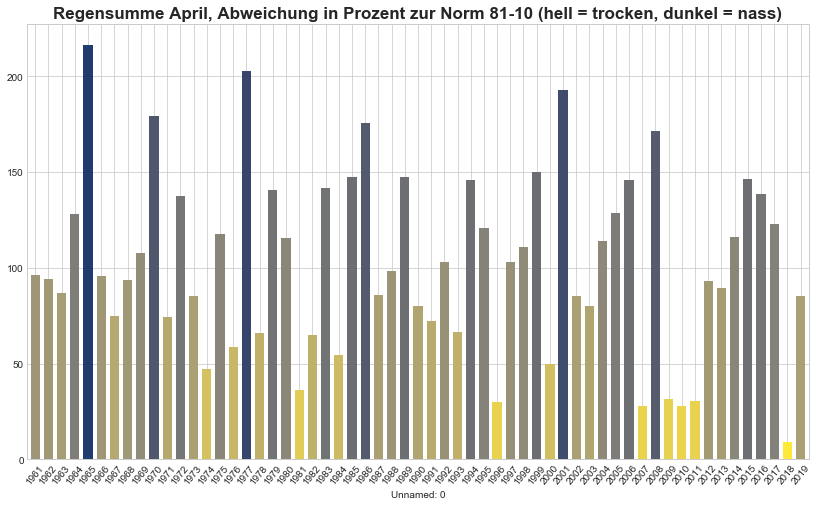

In [134]:
def line_format(label):
    month = label.month_name()[:3]
    year = label.year
    if month == 'apr':
        month = f'\n{label.year}'
    return year
grafikrain4 = dfnsapr_abw8110['Monatssumme'].plot(kind='bar',figsize=(14,8), 
                                                  color=raincolors4, rot=50, width=0.7)
grafikrain4.set_xticklabels(map(lambda x: line_format(x), dfnsapr_abw8110['Monatssumme'].index))
title_font = {'fontsize': 17, 'fontweight': 'bold', 'fontname': 'Arial'}
grafikrain4.set_title('Regensumme April, Abweichung in Prozent zur Norm 81-10 (hell = trocken, dunkel = nass)', 
                      fontdict=title_font)
plt.style.use('seaborn-whitegrid')

# Mai

In [135]:
minirain5 = dfnsmai_abw8110['Monatssumme'].min()
maxirain5 = dfnsmai_abw8110['Monatssumme'].max()+40

In [136]:
normingrain5 = matplotlib.colors.Normalize(vmin=minirain5, vmax=maxirain5, clip=True)

In [137]:
farbschema = plt.cm.cividis_r

In [138]:
mapperrain5 = plt.cm.ScalarMappable(norm=normingrain5, cmap=farbschema)

In [139]:
raincolors5 = dfnsmai_abw8110['Monatssumme'].apply(lambda x: mcolors.to_hex(mapperrain5.to_rgba(x)))

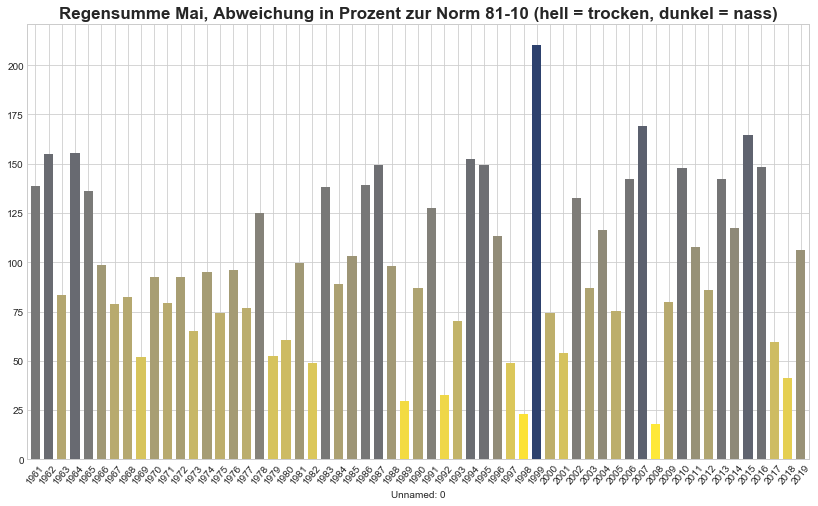

In [140]:
def line_format(label):
    month = label.month_name()[:3]
    year = label.year
    if month == 'mai':
        month = f'\n{label.year}'
    return year
grafikrain5 = dfnsmai_abw8110['Monatssumme'].plot(kind='bar',figsize=(14,8), 
                                                  color=raincolors5, rot=50, width=0.7)
grafikrain5.set_xticklabels(map(lambda x: line_format(x), dfnsmai_abw8110['Monatssumme'].index))
title_font = {'fontsize': 17, 'fontweight': 'bold', 'fontname': 'Arial'}
grafikrain5.set_title('Regensumme Mai, Abweichung in Prozent zur Norm 81-10 (hell = trocken, dunkel = nass)', 
                      fontdict=title_font)
plt.style.use('seaborn-whitegrid')

# Juni

In [141]:
minirain6 = dfnsjun_abw8110['Monatssumme'].min()
maxirain6 = dfnsjun_abw8110['Monatssumme'].max()+75

In [142]:
normingrain6 = matplotlib.colors.Normalize(vmin=minirain6, vmax=maxirain6, clip=True)

In [143]:
farbschema = plt.cm.cividis_r

In [144]:
mapperrain6 = plt.cm.ScalarMappable(norm=normingrain6, cmap=farbschema)

In [145]:
raincolors6 = dfnsjun_abw8110['Monatssumme'].apply(lambda x: mcolors.to_hex(mapperrain6.to_rgba(x)))

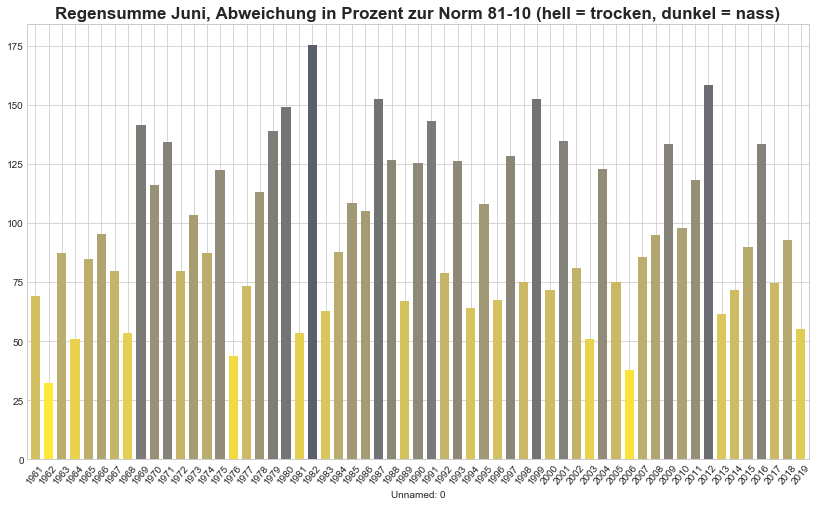

In [146]:
def line_format(label):
    month = label.month_name()[:3]
    year = label.year
    if month == 'jun':
        month = f'\n{label.year}'
    return year
grafikrain6 = dfnsjun_abw8110['Monatssumme'].plot(kind='bar',figsize=(14,8), 
                                                  color=raincolors6, rot=50, width=0.7)
grafikrain6.set_xticklabels(map(lambda x: line_format(x), dfnsjun_abw8110['Monatssumme'].index))
title_font = {'fontsize': 17, 'fontweight': 'bold', 'fontname': 'Arial'}
grafikrain6.set_title('Regensumme Juni, Abweichung in Prozent zur Norm 81-10 (hell = trocken, dunkel = nass)', 
                      fontdict=title_font)
plt.style.use('seaborn-whitegrid')

# Juli

In [147]:
minirain7 = dfnsjul_abw8110['Monatssumme'].min()
maxirain7 = dfnsjul_abw8110['Monatssumme'].max()

In [148]:
normingrain7 = matplotlib.colors.Normalize(vmin=minirain7, vmax=maxirain7, clip=True)

In [149]:
farbschema = plt.cm.cividis_r

In [150]:
mapperrain7 = plt.cm.ScalarMappable(norm=normingrain7, cmap=farbschema)

In [151]:
raincolors7 = dfnsjul_abw8110['Monatssumme'].apply(lambda x: mcolors.to_hex(mapperrain7.to_rgba(x)))

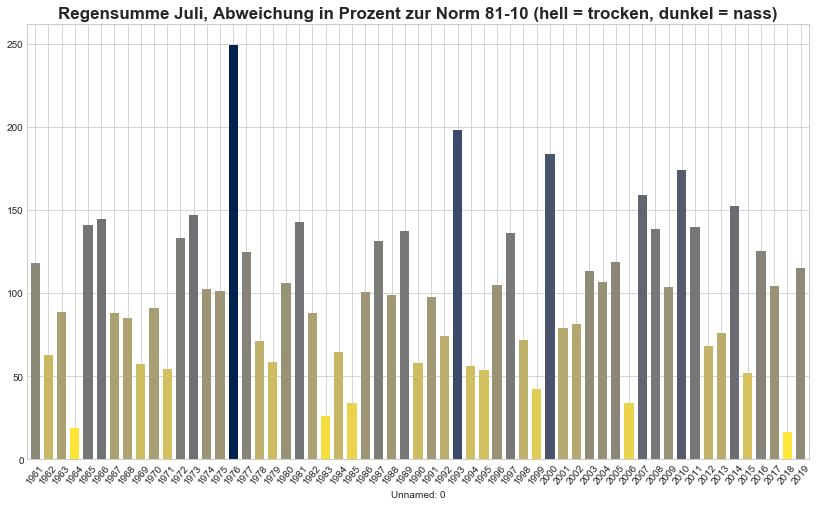

In [152]:
def line_format(label):
    month = label.month_name()[:3]
    year = label.year
    if month == 'jul':
        month = f'\n{label.year}'
    return year
grafikrain7 = dfnsjul_abw8110['Monatssumme'].plot(kind='bar',figsize=(14,8), 
                                                  color=raincolors7, rot=50, width=0.7)
grafikrain7.set_xticklabels(map(lambda x: line_format(x), dfnsjul_abw8110['Monatssumme'].index))
title_font = {'fontsize': 17, 'fontweight': 'bold', 'fontname': 'Arial'}
grafikrain7.set_title('Regensumme Juli, Abweichung in Prozent zur Norm 81-10 (hell = trocken, dunkel = nass)', 
                      fontdict=title_font)
plt.style.use('seaborn-whitegrid')

# August

In [153]:
minirain8 = dfnsaug_abw8110['Monatssumme'].min()
maxirain8 = dfnsaug_abw8110['Monatssumme'].max()+35

In [154]:
normingrain8 = matplotlib.colors.Normalize(vmin=minirain8, vmax=maxirain8, clip=True)

In [155]:
farbschema = plt.cm.cividis_r

In [156]:
mapperrain8 = plt.cm.ScalarMappable(norm=normingrain8, cmap=farbschema)

In [157]:
raincolors8 = dfnsaug_abw8110['Monatssumme'].apply(lambda x: mcolors.to_hex(mapperrain8.to_rgba(x)))

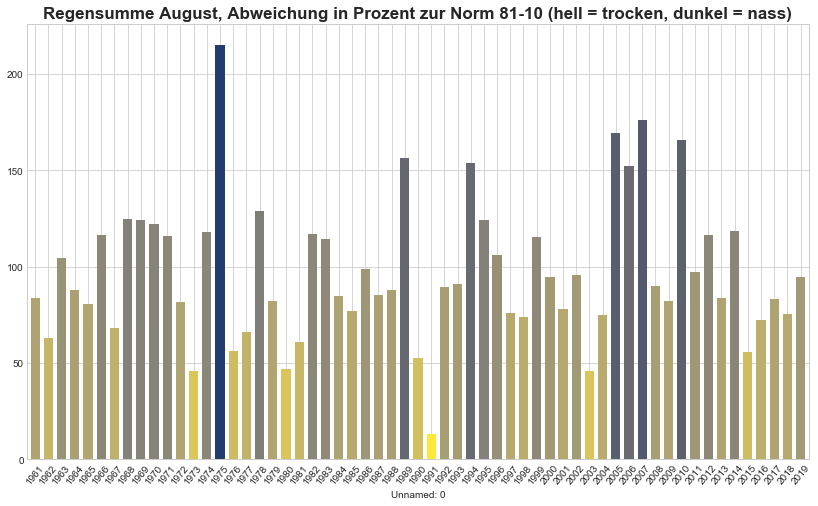

In [158]:
def line_format(label):
    month = label.month_name()[:3]
    year = label.year
    if month == 'aug':
        month = f'\n{label.year}'
    return year
grafikrain8 = dfnsaug_abw8110['Monatssumme'].plot(kind='bar',figsize=(14,8), 
                                                  color=raincolors8, rot=50, width=0.7)
grafikrain8.set_xticklabels(map(lambda x: line_format(x), dfnsaug_abw8110['Monatssumme'].index))
title_font = {'fontsize': 17, 'fontweight': 'bold', 'fontname': 'Arial'}
grafikrain8.set_title('Regensumme August, Abweichung in Prozent zur Norm 81-10 (hell = trocken, dunkel = nass)', 
                      fontdict=title_font)
plt.style.use('seaborn-whitegrid')

# September

In [159]:
minirain9 = dfnssep_abw8110['Monatssumme'].min()
maxirain9 = dfnssep_abw8110['Monatssumme'].max()+30

In [160]:
normingrain9 = matplotlib.colors.Normalize(vmin=minirain9, vmax=maxirain9, clip=True)

In [161]:
farbschema = plt.cm.cividis_r

In [162]:
mapperrain9 = plt.cm.ScalarMappable(norm=normingrain9, cmap=farbschema)

In [163]:
raincolors9 = dfnssep_abw8110['Monatssumme'].apply(lambda x: mcolors.to_hex(mapperrain9.to_rgba(x)))

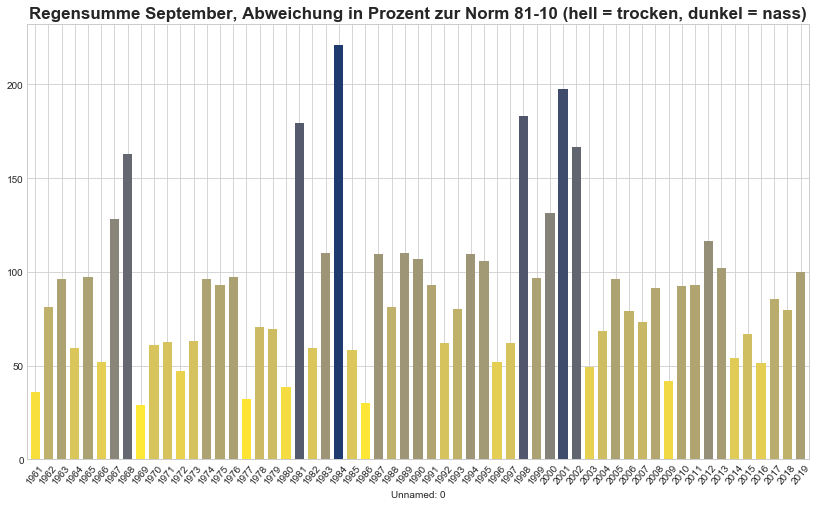

In [164]:
def line_format(label):
    month = label.month_name()[:3]
    year = label.year
    if month == 'sep':
        month = f'\n{label.year}'
    return year
grafikrain9 = dfnssep_abw8110['Monatssumme'].plot(kind='bar',figsize=(14,8), 
                                                  color=raincolors9, rot=50, width=0.7)
grafikrain9.set_xticklabels(map(lambda x: line_format(x), dfnssep_abw8110['Monatssumme'].index))
title_font = {'fontsize': 17, 'fontweight': 'bold', 'fontname': 'Arial'}
grafikrain9.set_title('Regensumme September, Abweichung in Prozent zur Norm 81-10 (hell = trocken, dunkel = nass)', 
                      fontdict=title_font)
plt.style.use('seaborn-whitegrid')

# Oktober

In [165]:
minirain10 = dfnsokt_abw8110['Monatssumme'].min()
maxirain10 = dfnsokt_abw8110['Monatssumme'].max()+25

In [166]:
normingrain10 = matplotlib.colors.Normalize(vmin=minirain10, vmax=maxirain10, clip=True)

In [167]:
farbschema = plt.cm.cividis_r

In [168]:
mapperrain10 = plt.cm.ScalarMappable(norm=normingrain10, cmap=farbschema)

In [169]:
raincolors10 = dfnsokt_abw8110['Monatssumme'].apply(lambda x: mcolors.to_hex(mapperrain10.to_rgba(x)))

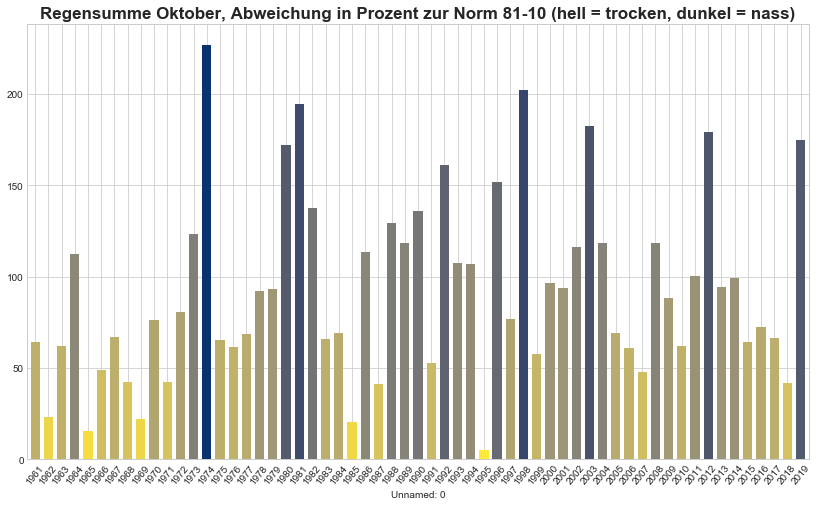

In [170]:
def line_format(label):
    month = label.month_name()[:3]
    year = label.year
    if month == 'okt':
        month = f'\n{label.year}'
    return year
grafikrain10 = dfnsokt_abw8110['Monatssumme'].plot(kind='bar',figsize=(14,8), 
                                                   color=raincolors10, rot=50, width=0.7)
grafikrain10.set_xticklabels(map(lambda x: line_format(x), dfnsokt_abw8110['Monatssumme'].index))
title_font = {'fontsize': 17, 'fontweight': 'bold', 'fontname': 'Arial'}
grafikrain10.set_title('Regensumme Oktober, Abweichung in Prozent zur Norm 81-10 (hell = trocken, dunkel = nass)', 
                      fontdict=title_font)
plt.style.use('seaborn-whitegrid')

# November

In [171]:
minirain11 = dfnsnov_abw8110['Monatssumme'].min()
maxirain11 = dfnsnov_abw8110['Monatssumme'].max()-15

In [172]:
normingrain11 = matplotlib.colors.Normalize(vmin=minirain11, vmax=maxirain11, clip=True)

In [173]:
farbschema = plt.cm.cividis_r

In [174]:
mapperrain11 = plt.cm.ScalarMappable(norm=normingrain11, cmap=farbschema)

In [175]:
raincolors11 = dfnsnov_abw8110['Monatssumme'].apply(lambda x: mcolors.to_hex(mapperrain11.to_rgba(x)))

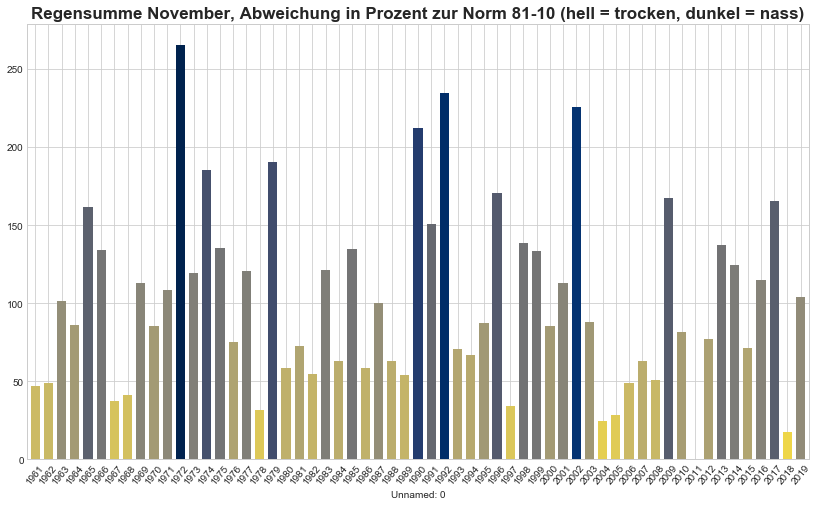

In [176]:
def line_format(label):
    month = label.month_name()[:3]
    year = label.year
    if month == 'nov':
        month = f'\n{label.year}'
    return year
grafikrain11 = dfnsnov_abw8110['Monatssumme'].plot(kind='bar',figsize=(14,8), 
                                                   color=raincolors11, rot=50, width=0.7)
grafikrain11.set_xticklabels(map(lambda x: line_format(x), dfnsnov_abw8110['Monatssumme'].index))
title_font = {'fontsize': 17, 'fontweight': 'bold', 'fontname': 'Arial'}
grafikrain11.set_title('Regensumme November, Abweichung in Prozent zur Norm 81-10 (hell = trocken, dunkel = nass)', 
                      fontdict=title_font)
plt.style.use('seaborn-whitegrid')

# Dezember

In [177]:
minirain12 = dfnsdez_abw8110['Monatssumme'].min()
maxirain12 = dfnsdez_abw8110['Monatssumme'].max()+20

In [178]:
normingrain12 = matplotlib.colors.Normalize(vmin=minirain12, vmax=maxirain12, clip=True)

In [179]:
farbschema = plt.cm.cividis_r

In [180]:
mapperrain12 = plt.cm.ScalarMappable(norm=normingrain12, cmap=farbschema)

In [181]:
raincolors12 = dfnsdez_abw8110['Monatssumme'].apply(lambda x: mcolors.to_hex(mapperrain12.to_rgba(x)))

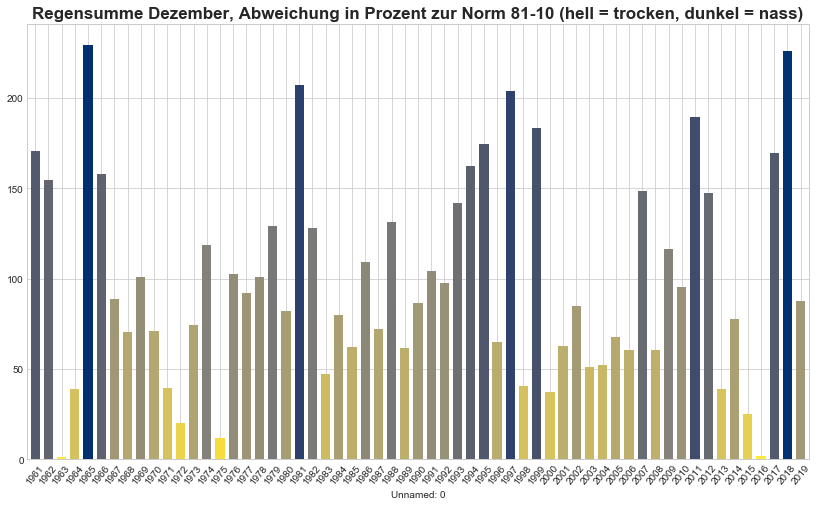

In [182]:
def line_format(label):
    month = label.month_name()[:3]
    year = label.year
    if month == 'dez':
        month = f'\n{label.year}'
    return year
grafikrain12 = dfnsdez_abw8110['Monatssumme'].plot(kind='bar',figsize=(14,8), 
                                                   color=raincolors12, rot=50, width=0.7)
grafikrain12.set_xticklabels(map(lambda x: line_format(x), dfnsdez_abw8110['Monatssumme'].index))
title_font = {'fontsize': 17, 'fontweight': 'bold', 'fontname': 'Arial'}
grafikrain12.set_title('Regensumme Dezember, Abweichung in Prozent zur Norm 81-10 (hell = trocken, dunkel = nass)', 
                      fontdict=title_font).get_figure().savefig('12 Dezember NS.png')
plt.style.use('seaborn-whitegrid')

# Aktuelle Abweichungen für 2019 berechnen (gg. Mean 61-90 / Mean 8110)
Datenanalyse für die Wetterstory vom 4.1.2019 in der Zürichsee-Zeitung (Klimarückblick 2019), kein direkter Zusammenhang mit der Diplomarbeit

In [183]:
#Temperaturdaten 2019 separieren
df_temp_only.tail(11)

Unnamed: 0
2019-02-01     3.6
2019-03-01     7.3
2019-04-01     9.6
2019-05-01    11.1
2019-06-01    20.1
2019-07-01      21
2019-08-01    19.2
2019-09-01    15.3
2019-10-01      12
2019-11-01     5.9
2019-12-01     4.4
Name: Monatsmittel, dtype: object

In [184]:
df_temp_2019 = df_temp_only.tail(11)
df_temp_2019

Unnamed: 0
2019-02-01     3.6
2019-03-01     7.3
2019-04-01     9.6
2019-05-01    11.1
2019-06-01    20.1
2019-07-01      21
2019-08-01    19.2
2019-09-01    15.3
2019-10-01      12
2019-11-01     5.9
2019-12-01     4.4
Name: Monatsmittel, dtype: object

In [185]:
df_temp_2019 = pd.DataFrame(df_temp_2019)
df_temp_2019

,Monatsmittel
Unnamed: 0,
2019-02-01,3.6
2019-03-01,7.3
2019-04-01,9.6
2019-05-01,11.1
2019-06-01,20.1
2019-07-01,21
2019-08-01,19.2
2019-09-01,15.3
2019-10-01,12


In [186]:
#Temperaturen 2019
df1 = pd.DataFrame({'jan': [0.3],
 'feb': [3.6],
 'mar': [7.3],
 'apr': [9.6],
 'mai': [11.1],
 'jun': [20.1],
 'jul': [21],
 'aug': [19.2],
 'sep': [15.3],
 'okt': [12],
 'nov': [5.9],
 'dez': [4.4]},
index=[0])

In [187]:
frames = [df1,df2]
result = pd.concat(frames)

In [188]:
result

,jan,feb,mar,apr,mai,jun,jul,aug,sep,okt,nov,dez
0,0.3,3.6,7.3,9.6,11.1,20.1,21,19.2,15.3,12.0,5.9,4.4
1,-0.4,1.0,4.2,8.1,12.4,15.7,18,17.0,14.2,9.5,4.3,0.7


In [189]:
result.loc[0] - result.loc[1]

jan    0.7
feb    2.6
mar    3.1
apr    1.5
mai   -1.3
jun    4.4
jul    3.0
aug    2.2
sep    1.1
okt    2.5
nov    1.6
dez    3.7
dtype: float64

In [190]:
abw19_mean6190 = result.loc[0] - result.loc[1]

In [191]:
abw19_mean6190 = pd.DataFrame(abw19_mean6190)

In [192]:
abw19_mean6190

,0
jan,0.7
feb,2.6
mar,3.1
apr,1.5
mai,-1.3
jun,4.4
jul,3.0
aug,2.2
sep,1.1
okt,2.5


In [193]:
frames2 = [df1,df3]
result2 = pd.concat(frames2)

In [194]:
result2

,jan,feb,mar,apr,mai,jun,jul,aug,sep,okt,nov,dez
0,0.3,3.6,7.3,9.6,11.1,20.1,21,19.2,15.3,12.0,5.9,4.4
2,0.3,1.2,5.2,9.0,13.6,16.8,19,18.3,14.4,10.2,4.6,1.6


In [195]:
abw19_mean8110 = result2.loc[0] - result2.loc[2]

In [196]:
abw19_mean8110 = pd.DataFrame(abw19_mean8110)

In [197]:
abw19_mean8110

,0
jan,0.0
feb,2.4
mar,2.1
apr,0.6
mai,-2.5
jun,3.3
jul,2.0
aug,0.9
sep,0.9
okt,1.8


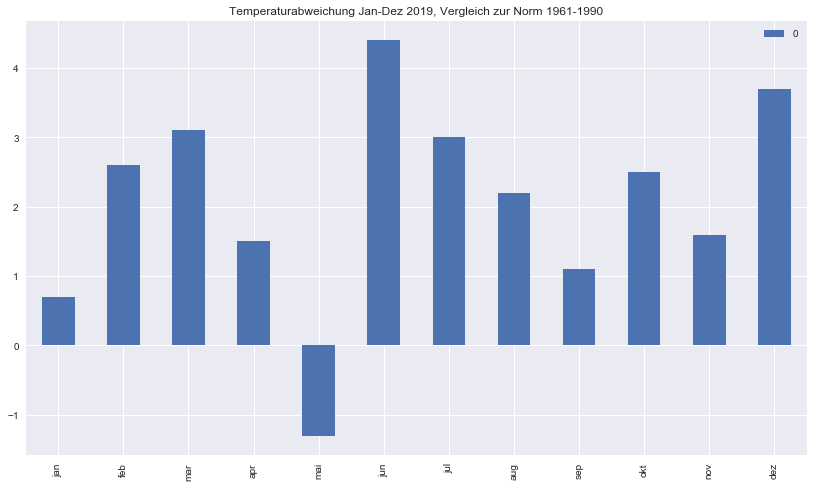

In [198]:
plt.style.use('seaborn')
abw19_mean6190.plot(kind='bar',figsize=(14,8),
                  title='Temperaturabweichung Jan-Dez 2019, Vergleich zur Norm 1961-1990')

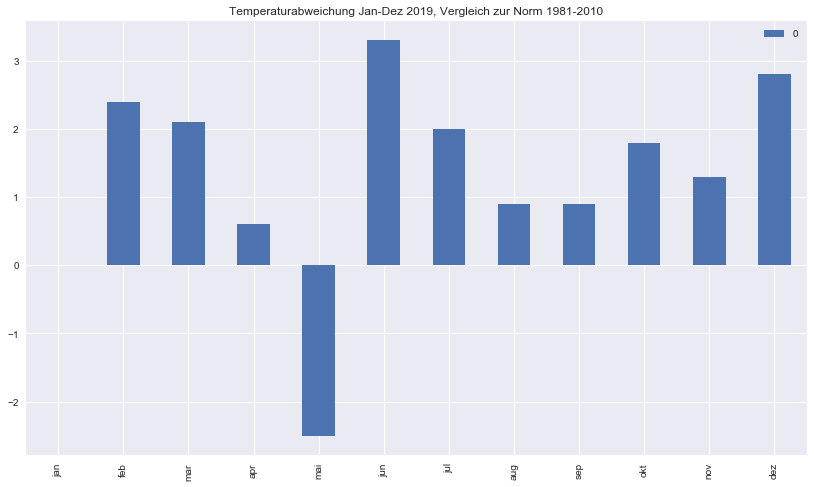

In [199]:
plt.style.use('seaborn')
abw19_mean8110.plot(kind='bar',figsize=(14,8),
                  title='Temperaturabweichung Jan-Dez 2019, Vergleich zur Norm 1981-2010')

In [200]:
df_ns_only.tail(12)
df_ns_2019 = df_ns_only.tail(12)

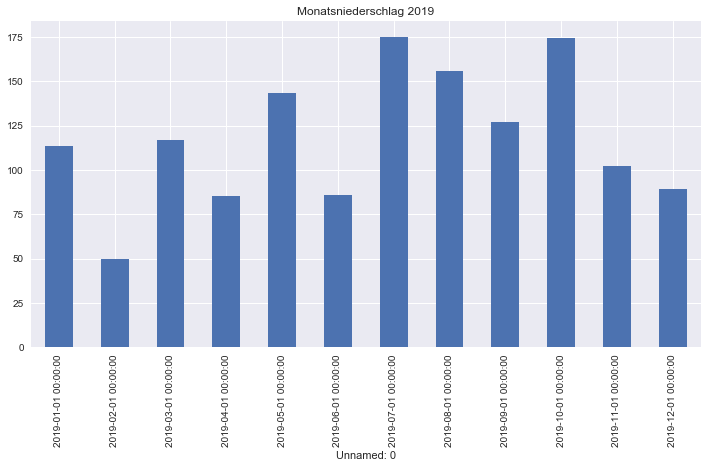

In [201]:
plt.style.use('seaborn')
df_ns_2019.plot(kind='bar', figsize=(12,6), title='Monatsniederschlag 2019')

In [202]:
#Dataframe Niederschlag Norm 1981-2010
mean_ns8110 = pd.DataFrame({'jan':[82],'feb':[77],'mar':[99],'apr':[100],'mai':[135],
                            'jun':[155],'jul':[152],'aug':[164],'sep':[127],
                            'okt':[100],'nov':[98],'dez':[102]},index=[0])

In [203]:
#Dataframe Niederschlag Jan-Dez 2019
ns2019 = pd.DataFrame({'jan':[113.7],'feb':[50],'mar':[116.8],'apr':[85.1],'mai':[143.7],
                       'jun':[85.8],'jul':[175.3],'aug':[155.6],'sep':[126.9],
                       'okt':[174.5],'nov':[102],'dez':[89.4]},index=[1])

In [204]:
frames = [ns2019,mean_ns8110]
ns_result = pd.concat(frames)

In [205]:
ns_result

,jan,feb,mar,apr,mai,jun,jul,aug,sep,okt,nov,dez
1,113.7,50,116.8,85.1,143.7,85.8,175.3,155.6,126.9,174.5,102,89.4
0,82.0,77,99.0,100.0,135.0,155.0,152.0,164.0,127.0,100.0,98,102.0


Print png applyer:

.get_figure().savefig('bautätigkeit.png')